# $\textbf{Stock Volatility Forecasting Report}$

This is a report on analyzing and forecasting the stock price volatility based on data using ```ARIMA``` models, $\textbf{Recurrent Neural Networks (RNNs)}$, $\textbf{Convolutional Neural Network (CNNs)}$ and $\textbf{Generative Adversarial Network (GAN)}$. The global structure of the report is:

$\textbf{Part I. Data analysis and cleaning}$
  - Basic manipulation and analysis
  - Data cleaning
  - Data preparation


$\textbf{Part II. Statistical analysis}$
  - Statistical analysis of the volatility data
  - Time series analysis with ```ARIMA```

$\textbf{Part III. Deep learning models}$
  
  - Basic model: single-step, single-feature forecasting with LSTM
  - Generalized model: multi-step, multi-feature forcasting with LSTM
  - Advanced model: Generative Adversarial Network (GAN) with RNN and CNN. 

$\textbf{Part IV. Conclusions and Next steps}$
  - Conclusions
  - Next steps


References:

- [My own deep learning project](https://github.com/Waerden001/USMacro)
- [Using the latest advancements in deep learning to predict stock price movements](https://towardsdatascience.com/aifortrading-2edd6fac689d)


## $\textbf{Introduction}$

### 1. <a>The Notebook</a>

Follow the notebook, we can recreate all the results, notice the followings
- Upload the ```stockdata3.csv``` file to the root folder on google colab.
- To navigate better, use the table of contents bottom on the upper-left sidebar. 
- $\textbf{For clarity, all code cells are hiden, double click on the cell to get the code}$. 
- Change the parameters as indicated in the comments to create more custom outputs.  
- All source code can also be found in the project file folder


### 2. The stock prices dataset

This report uses a <a>Stock Prices Dataset</a> provided by [SIG](https://https://sig.com/).

Before analyzing the data with codes, we have the following observations. 

- This dataset contains $\textbf{6}$ different stocks $\textbf{a, b, c, d,e}$ and $\textbf{f}$.
- Data were collected every $\textbf{1}$ minute, beginning from $\textbf{Day 1, 9:30 am to Day 362, 16:00 pm}$. 
- In total, we have $\textbf{98353 rows (minutes)}$ and $\textbf{8 columns (day number, time string, and 6 stocks)}$.

## $\textbf{Part I. Data analysis and cleaning}$

## $\textbf{Basic manipulation}$

### Code and examples

In [0]:
#@title ```basic.py```

#import numpy, pandas and matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#Basic checks: find null values, set index, etc.

def basic_check(df, index_name="day"):
  """Find the null values and set index of a given DataFrame.
  :param: df, pd.DataFrame, the data, e.g. df = pd.read_csv("stockdata3.csv")
  :param: index_name, str, name of the index, must be one of the column names, e.g. index_name ="day"
  :rtype: pd.DataFrame
  """
  df.set_index(index_name, inplace=True)
  df.index = pd.to_datetime(df.index,unit='D')

  #check for null entries
  print("Null values summary:\n")
  print(df.isnull().sum())

  return df

def plot_column(df, feature):
    """Plot the resampled column of df, e.g. plot_column(df, "a") plots the "a" column
    
    :param: df, pandas.DataFrame, the data, e.g. df = pd.read_csv("stockdata3")
    :param: feature, str, name of column to be plotted. 
    """
    y = df[feature]
    y.plot(figsize=(28, 8))
    plt.xlabel('Minute number')
    plt.ylabel("Stock "+feature)
    plt.show()

def day_check(df, column_name = "day"):
  for ii in df['day'].unique():
    if(len(df[df['day']==ii])!=391):
      print("Day "+str(ii)+" has "+str(len(df[df['day']==ii]))+" minutes data!")
      print(df[df['day']==ii].tail())


def date_check(df):
  for date in df.index.unique():
    if(len(df[df.index==date])!=391):
      print("Day "+str(date)+" has "+str(len(df[df.index==date]))+" minutes data!")
      print(df[df.index==date].tail())


In [0]:
#@title read the file and show the head

stock_data = pd.read_csv("stockdata3.csv")
stock_data.head()

,day,timestr,a,b,c,d,e,f
0,1,09:30:00,325.450,13.795,94.500,49.985,49.93,17.025
1,1,09:31:00,325.245,13.890,94.515,49.990,49.96,17.025
2,1,09:32:00,325.580,13.905,94.565,49.995,49.96,17.025
3,1,09:33:00,325.470,13.955,94.645,50.065,49.92,17.025
4,1,09:34:00,325.295,13.975,94.580,50.030,49.90,17.025


In [0]:
#@title days per month, minutes per day and find special day(s)

print("Mean number of days per month: "+str(len(stock_data['day'].unique())/12))
print("Mean number of sample points per day: "+str(len(stock_data)/(12*21)))
day_check(stock_data)

Mean number of days per month: 21.0
Mean number of sample points per day: 390.2857142857143
Day 327 has 211 minutes data!
       day   timestr        a      b       c       d      e      f
88963  327  12:56:00  364.570  5.115  43.413  43.935  40.24  9.765
88964  327  12:57:00  364.700  5.115  43.405  43.875  40.24  9.765
88965  327  12:58:00  364.545  5.215  43.405  43.865  40.27  9.765
88966  327  12:59:00  364.380  5.125  43.325  43.855  40.33  9.765
88967  327  13:00:00  363.580  5.225  43.333  43.835  40.31  9.765


In [0]:
#@title Basic checks: find null values and fill, set index, etc.
df = basic_check(stock_data)
df.head()


Null values summary:

timestr       0
a            71
b             0
c            31
d            18
e             0
f          1371
dtype: int64


,timestr,a,b,c,d,e,f
day,,,,,,,
1970-01-02,09:30:00,325.450,13.795,94.500,49.985,49.93,17.025
1970-01-02,09:31:00,325.245,13.890,94.515,49.990,49.96,17.025
1970-01-02,09:32:00,325.580,13.905,94.565,49.995,49.96,17.025
1970-01-02,09:33:00,325.470,13.955,94.645,50.065,49.92,17.025
1970-01-02,09:34:00,325.295,13.975,94.580,50.030,49.90,17.025


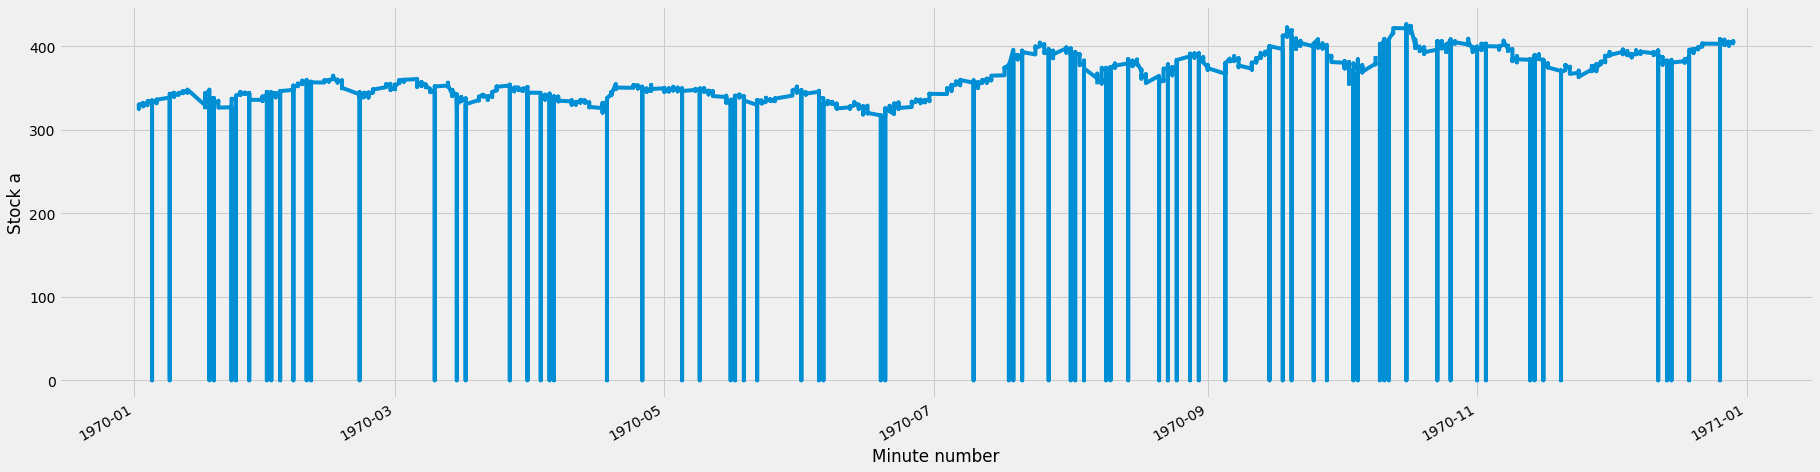

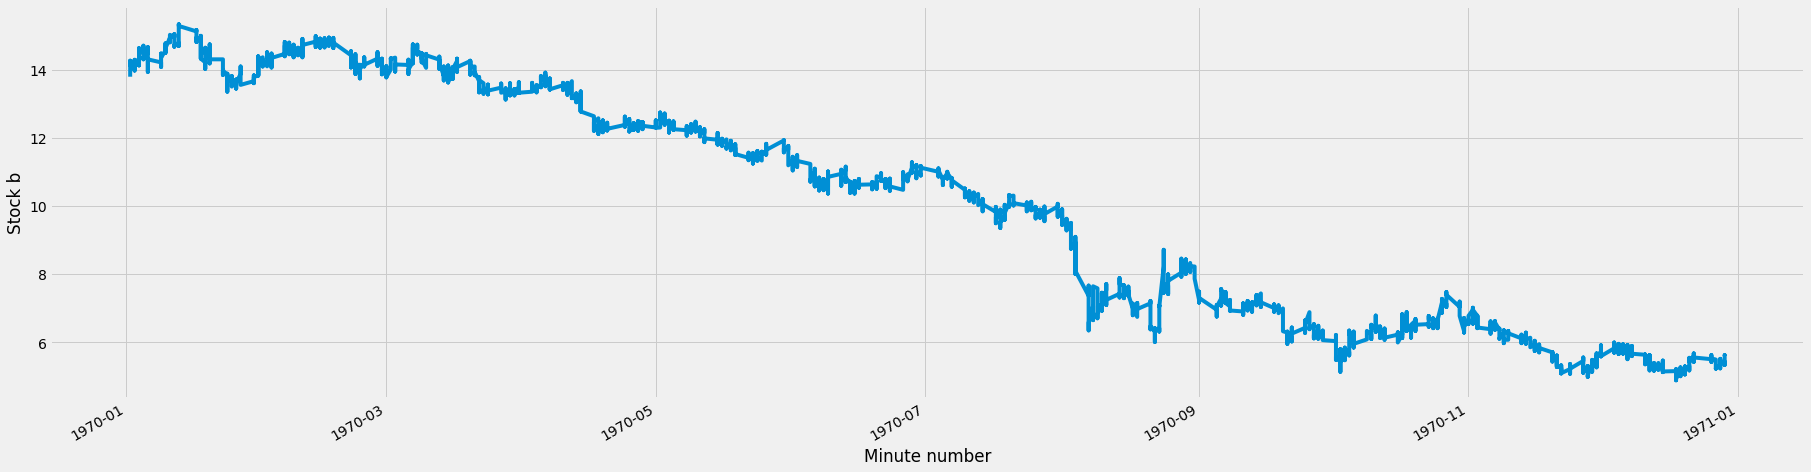

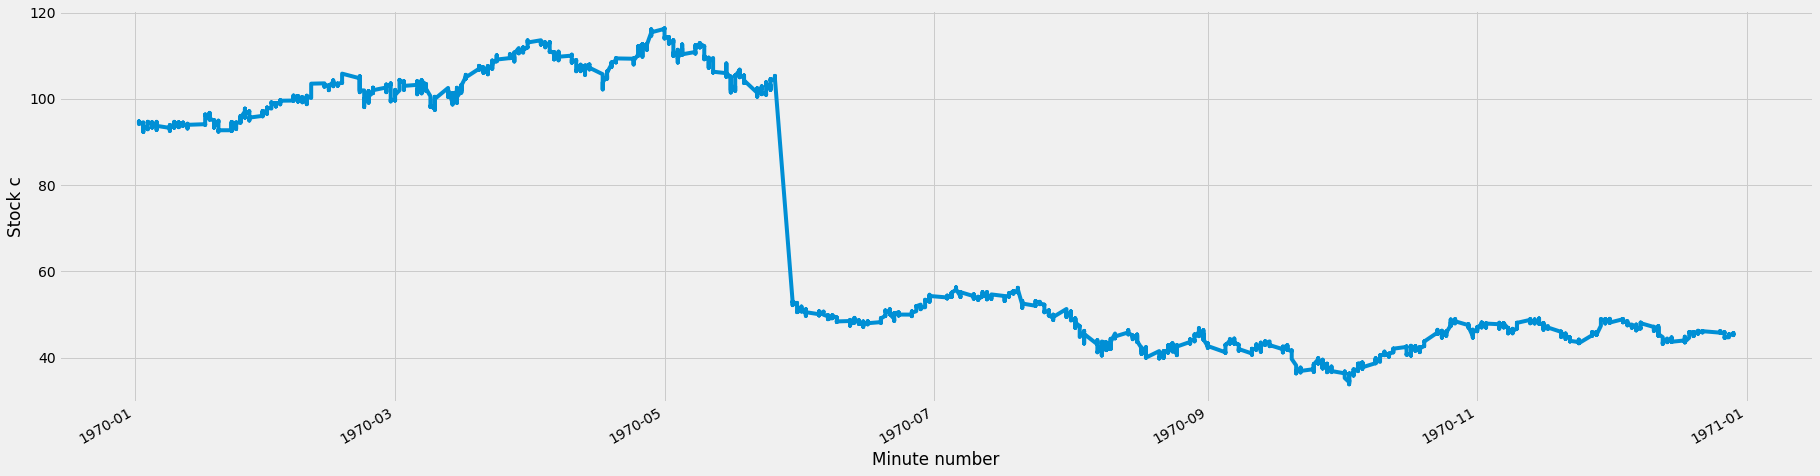

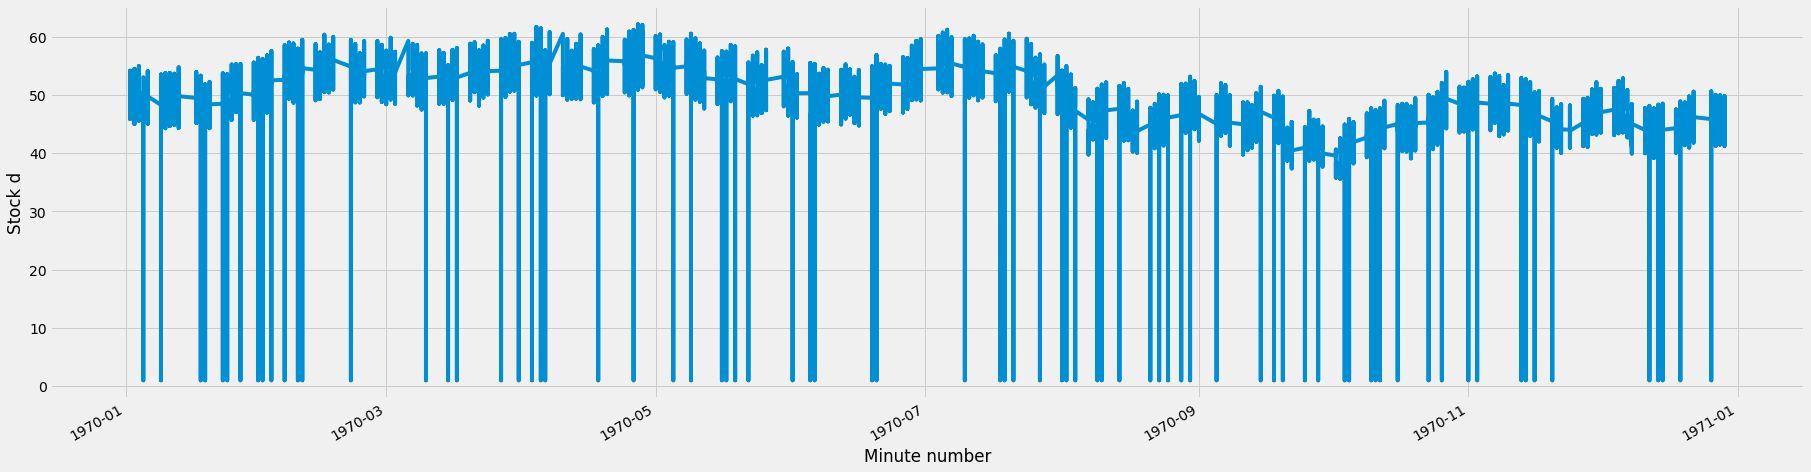

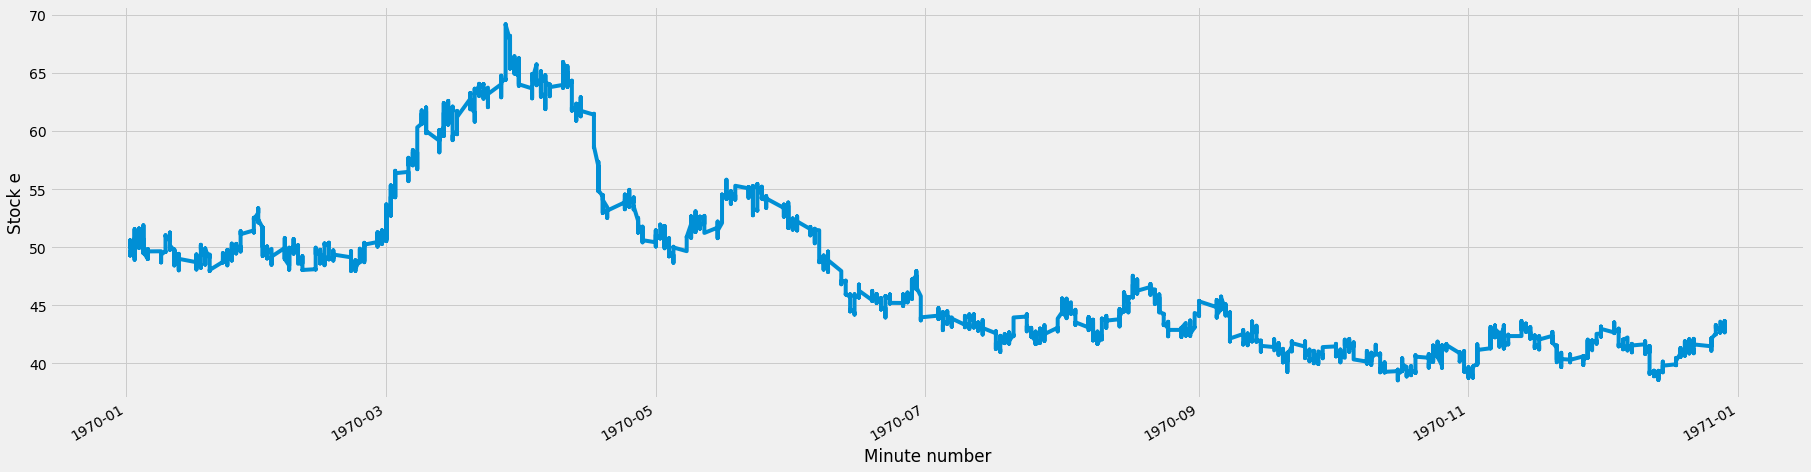

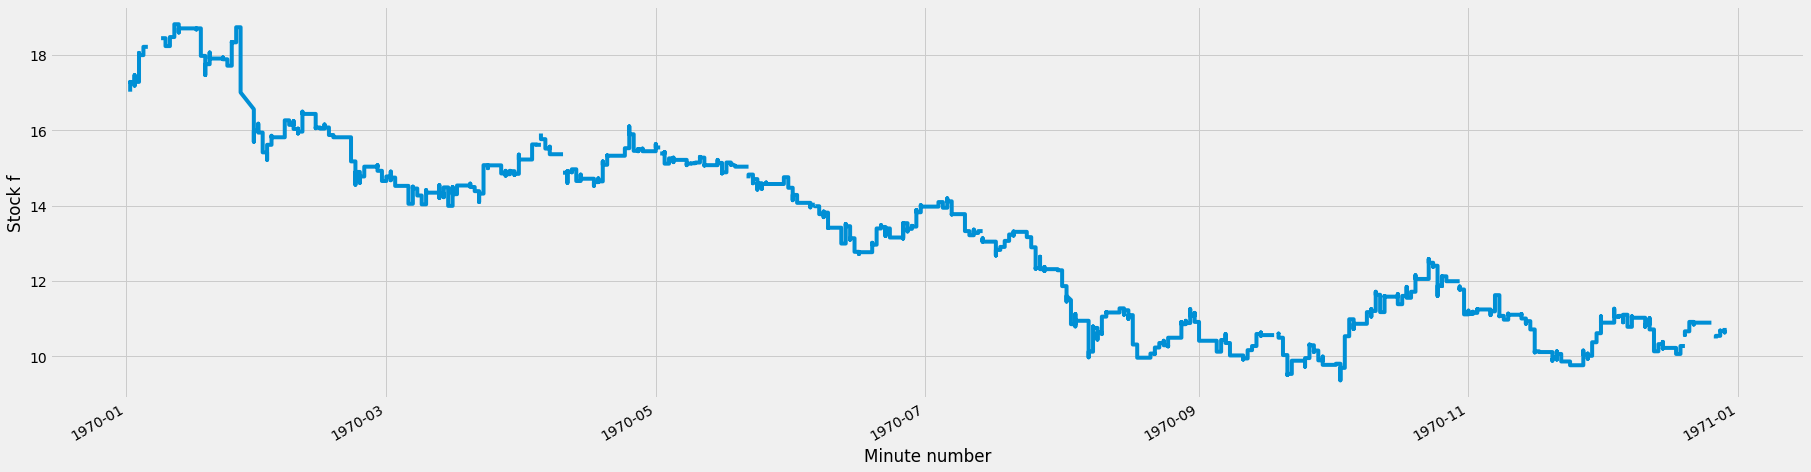

In [0]:
#@title Example: plot the stock price columns
"""
Replace "a" by any feature in our data to get other plot. 
"""
stock_list = ["a", "b", "c", "d", "e", "f"]
for stock in stock_list:
  plot_column(df, stock)

### Data Analysis
Basic aspects:

- Most days contain data for the full $391$ minutes from ```9:30 am``` to ```4:00 pm```
- Day $327$ doesn't have the full number ofminutes, the data stops at ```1:00 pm``` that day, it only contains $211$ data points.
- Every month contains $21$ days.






As a high level overview, some distinguishable features appear when we plot the data:

- Prices of  $a\textbf{ drop abnormally}$ at some random places.
- Prices of $b$ seem to have relatively stable volatility in the first $7$ months and last $3$ months and have relatively unstable and large volatility in the $8$-th and $9$-th month. 
- Prices of $c$ $\textbf{drop drastically}$ in the $6$-th month, besides that, the price of $c$ is quite stable
- Prices of  $d\textbf{ drop abnormally}$ at some random places.
- Prices of $d$ have a $\textbf{large day-to-day volatility}$ compared to the longer-term volatility. 
- Prices of $f$ are very $\textbf{illiquid}$, that is, the prices don't move much on a minute-to-minute basis or even on a day-to-day scale. 
- Peices of $b$ and $e$ have no null entries, no random drops.

In [0]:
#@title check for special day(s)
date_check(stock_data)

Day 1970-11-24 00:00:00 has 211 minutes data!
             timestr        a      b       c       d      e      f
day                                                               
1970-11-24  12:56:00  364.570  5.115  43.413  43.935  40.24  9.765
1970-11-24  12:57:00  364.700  5.115  43.405  43.875  40.24  9.765
1970-11-24  12:58:00  364.545  5.215  43.405  43.865  40.27  9.765
1970-11-24  12:59:00  364.380  5.125  43.325  43.855  40.33  9.765
1970-11-24  13:00:00  363.580  5.225  43.333  43.835  40.31  9.765


In [0]:
#@title check for random drops in prices of stock a and stock d
print(f"Stock prices of a have {len(df[df['a']==0])} random drops")
print(f"Stock prices of d have {len(df[df['d']<10])} random drops")
print(f"Stock prices of a and d drop at the same time in {df[(df['a']==0) & (df['d']<10)].shape[0]} places")

df[(df['a']==0) & (df['d']<10)][["a", "d"]]


Stock prices of a have 93 random drops
Stock prices of d have 93 random drops
Stock prices of a and d drop at the same time in 93 places


,a,d
day,,
1970-01-05,0.0,1.0
1970-01-09,0.0,1.0
1970-01-18,0.0,1.0
1970-01-19,0.0,1.0
1970-01-23,0.0,1.0
...,...,...
1970-12-12,0.0,1.0
1970-12-14,0.0,1.0
1970-12-15,0.0,1.0


### Data analysis
- The times of the price drops in stock $a$ and stock $d$ seem to be random and appear on $93$ different days. 
- The price drops of stock $a$ and $d$ happend $\textbf{at the exactly  same places}$. 
- Abnormal values of $a$ are all $0.0$'s, abnormal values of $b$ are all $1.0$'s.

We conclude that $\textbf{these drops are recording errors}$, the default value of missing $a$ price is $0.0$, the default value of missing $b$ price is $1.0$. 

## $\textbf{Data cleaning}$

### Data cleaning: set abnormal values to NaN
We set those abnormal values in the prices of stock $a$ and stock $d$ as $\textbf{NaN}$, which makes it compatible for our later use of the windows functionality of pandas.

In [0]:
#@title set abnormal values to NaN
df["a"] =df["a"].replace(0,np.nan)
df["d"] =df["d"].replace(1.0,np.nan)
#plot_column(df, "a")
#plot_column(df, "d")

### Data cleaning: add missing data on day $327$

In [0]:
#@title Compute volatility
#copy base data into new dataframe
df_clean=df.copy() 

#replace spurious prices -> NaN
df_clean['a']=df['a'].replace(0,np.nan);
df_clean['d']=df['d'].replace(1.0,np.nan);

#references to days < and > day 327
df_left=df[df.index<"1970-11-24"]
df_right=df[df.index>"1970-11-24"]
df_special_temp=df[df.index=="1970-11-24"].copy() #copy a new version of day 327 data to prevent pointer issues

# we miss 391-211=180 rows in the day, so we chose a normal,here 1970-01-05 and take out the
# last 180 rows, that's 211:391 and fill it with NaNs and change the index to be day 327, that is 1970-11-24
df_more =df[df.index=="1970-01-05"][211:391].copy()
df_more.loc[df_more['a'] > 0, ['a','b', 'c', 'd', 'e', 'f']] = np.nan
df_more.index= [ pd.to_datetime("1970-11-24") for _ in range(df_more.shape[0])]

#concatenate
df_new=pd.concat([df_left,df_special_temp,df_more, df_right])



### Make sure we already have what we want

- no random drops in prices of stock $a$ and stock d
- day 327 has full 391 rows



Day 327 now has 391 minutes of data




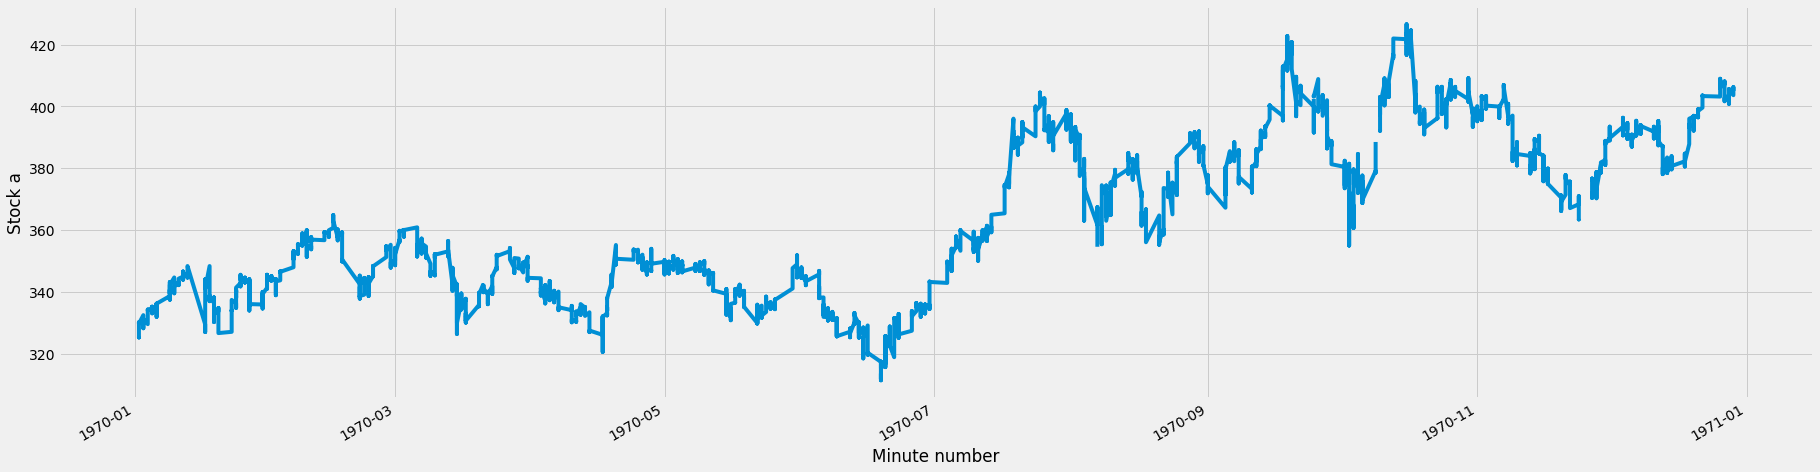

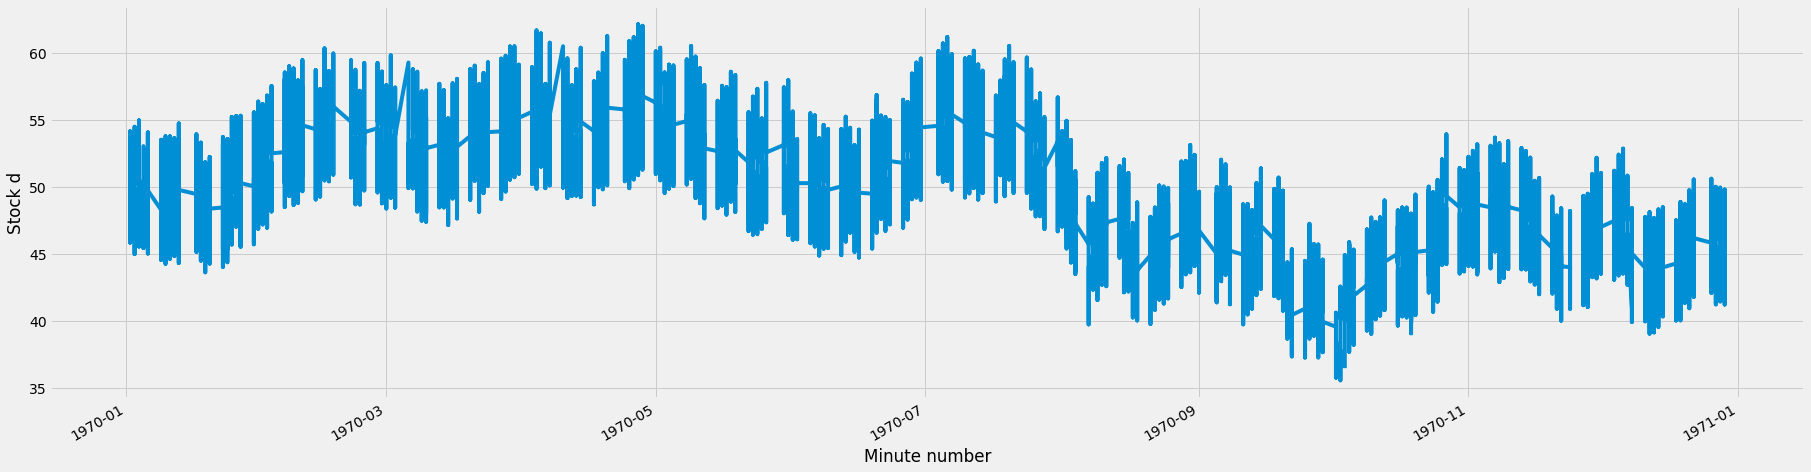

In [0]:
#@title cleaned data

minute_new = len(df_new[df_new.index=="1970-11-24"])
print(f"Day 327 now has {minute_new} minutes of data\n\n")
plot_column(df_new, "a")
plot_column(df_new, "d")

## $\textbf{Data preparation: from prices to daily volatility of annualized monthly percent return}$

We first define the quantity(volatility measured in annualized percent return) that we're interested in and related concepts. Then we discuss how the following factors affect our code realization
- Quantities of interest
- Model assumptions
- Frequency of sampling

### Quantities of interest: Daily volatility of annualized monthly percent return $\sigma_{d,m}(t)$

---
Definition: the **Annualized monthly percent return** $A_{m}(t)$ at time $t$ is given by
$$\begin{align*}A_{m}(t) &= (\frac{\text{Price at time a month later than } t}{\text{Price at time }t})^{\frac{1\text{ year}}{\text{1 month}}}-1\\
&=(\frac{p(t+t_{m})}{p(t)})^{12}-1\end{align*},$$
where 
- $p(t)$ denote the price at time $t$, we use $\textbf{minute}$ as the unit, the same as in our ```stockdata3.csv``` dataset
- $t_{m}$ denote a month in unit of the dataset, for our ```stockdata3.csv``` dataset, $t_m= 391\text{ mins/day}\times 21\text{ days}=8211\text{ mins}$
---

Definition: the **Daily volatility of annualized monthly percent return** $\sigma_{d,m}(t)$ at time $t$ is defined to be the sample deviation of the set $\{A_{m}(x)|t\leq x\leq t+t_{d}\}$, where
- $t_{d}$ denote the number of minutes in a day, for us $t_{d}=391$.
To be more precise
$$\sigma_{d,m}(t) = \sqrt{\displaystyle  \left[\frac{1}{t_d}\sum_{j=0}^{t_d} \left(A_m(t+j) -
\frac{1}{t_d+1} \sum_{i=0}^{t_d} A_m(t+i)\right)^{2} \right]}$$ 
---






### Model assumptions

- We're interested in the statistics on percent returns after holding an asset for a month (but we can always change this if we want later).
- Volatility is a constant in a day.

The first assumption tells us how to chose window size to compute the annualized percent return. We use the rolling window and standard deviation functionality in ```pandas``` to compute our volatility  of annualized monthly percent return. The fist assumption gives us the parameters we need 
- window size: ```t_m = t_d*21=8211```
- window moving step:```1```, that is (every minute has a annualized percent return)

The second assumption let us estimate the volatility by computing sample deviation of the percent return data in a day.
- sample size: ```t_d=391```, that is we use a consecutive sequence of $391$ data points to compute the sample deviation.
- sample frenquency: ```t=1```, that is we'll consider the daily movement of the volatility.


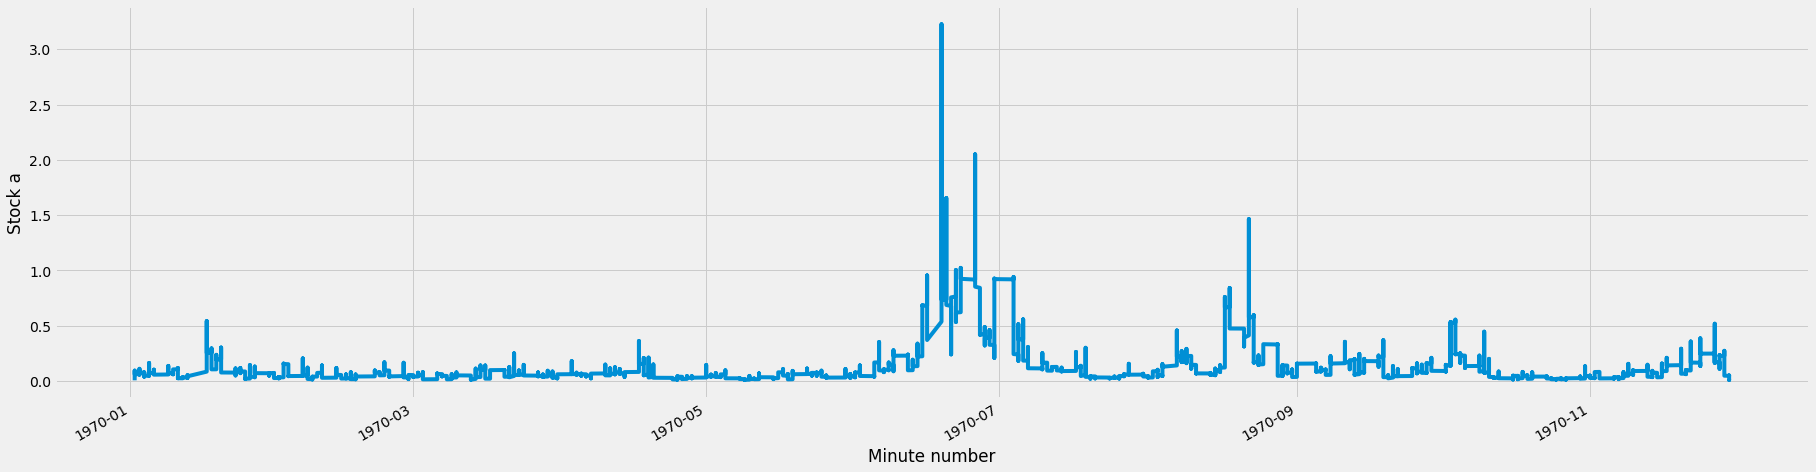

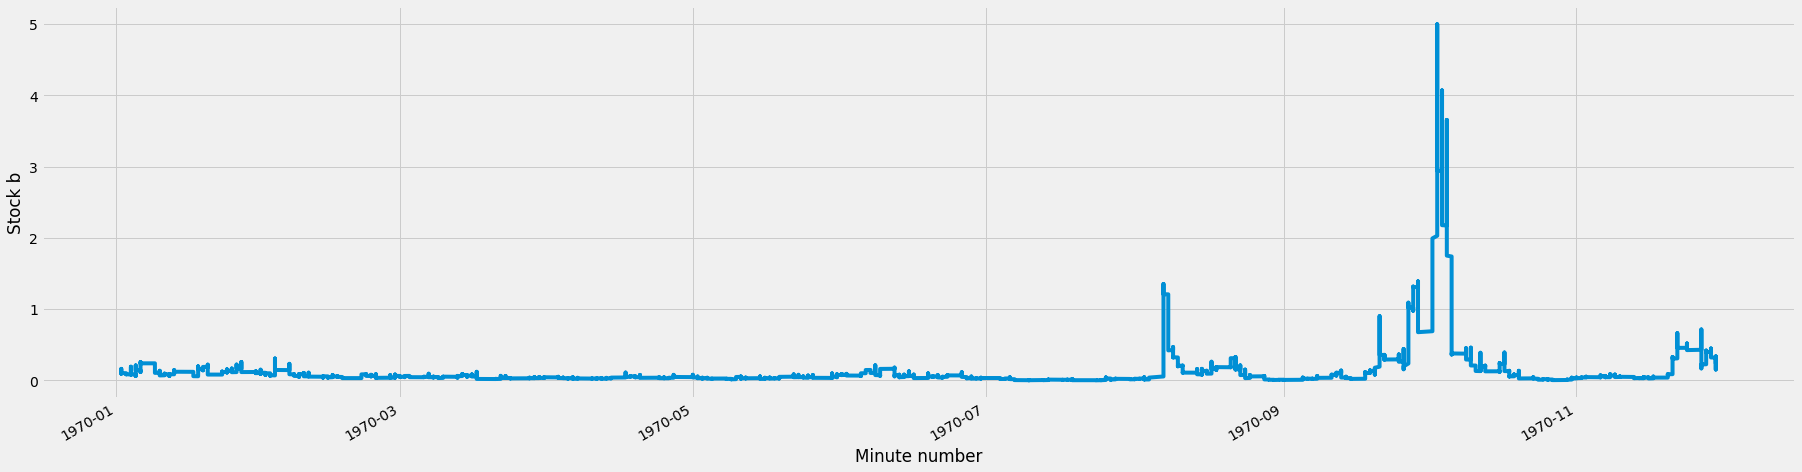

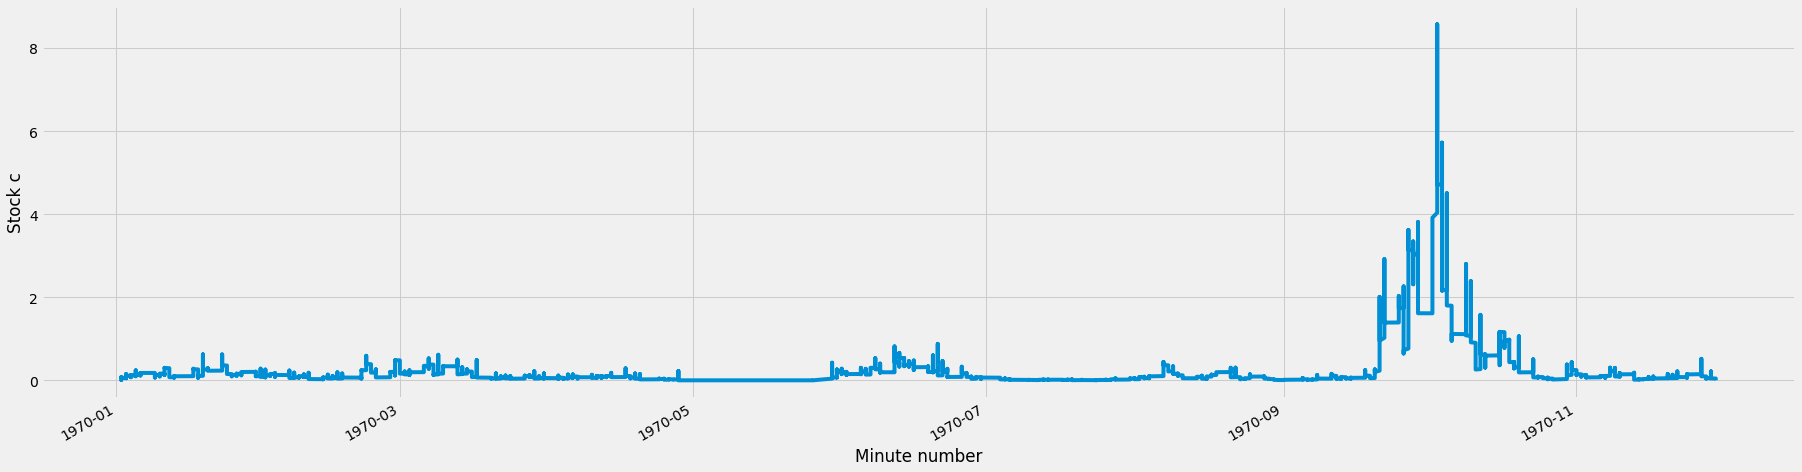

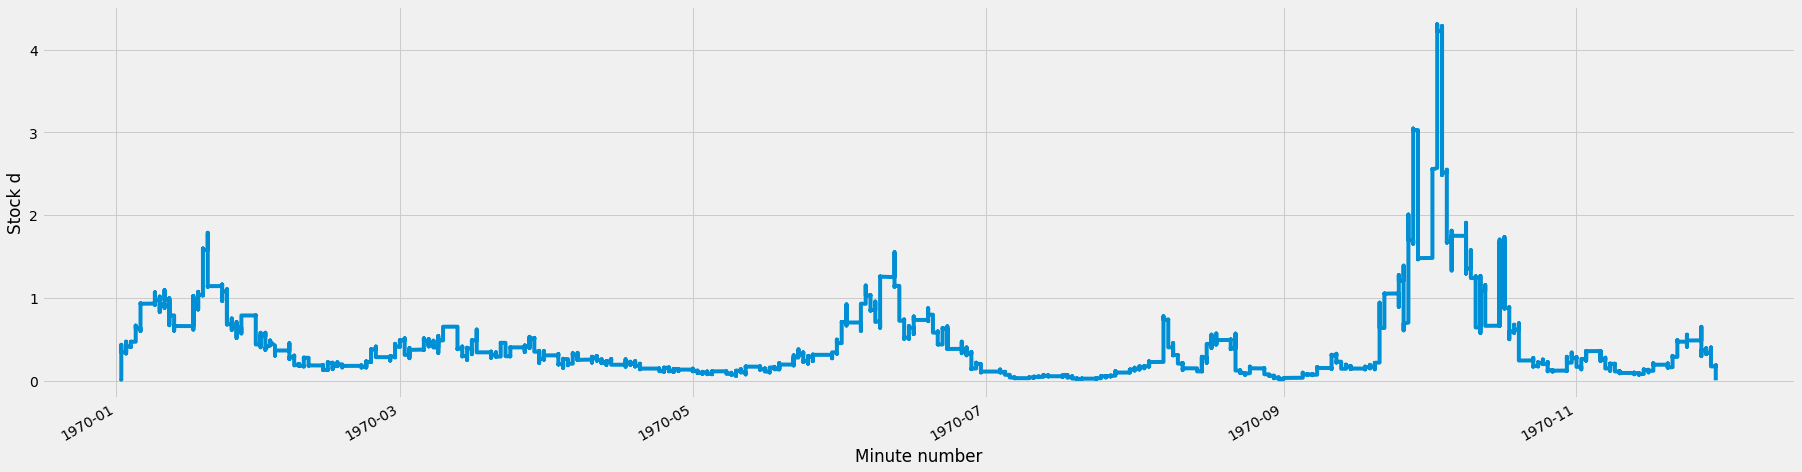

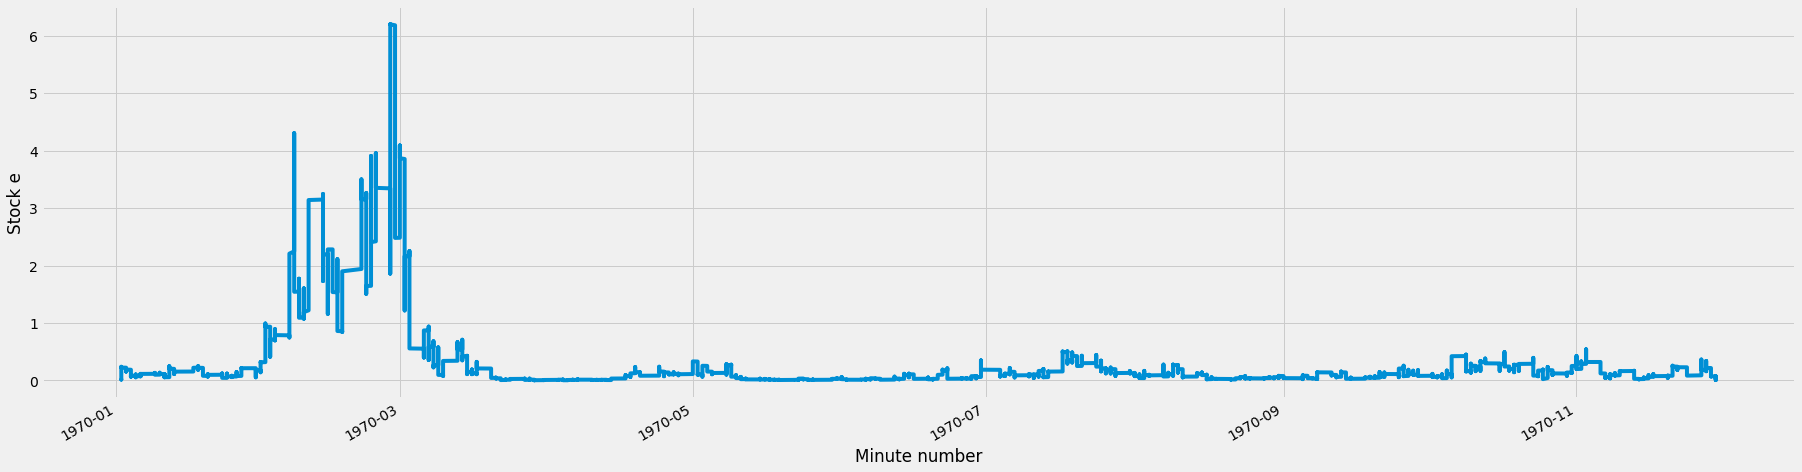

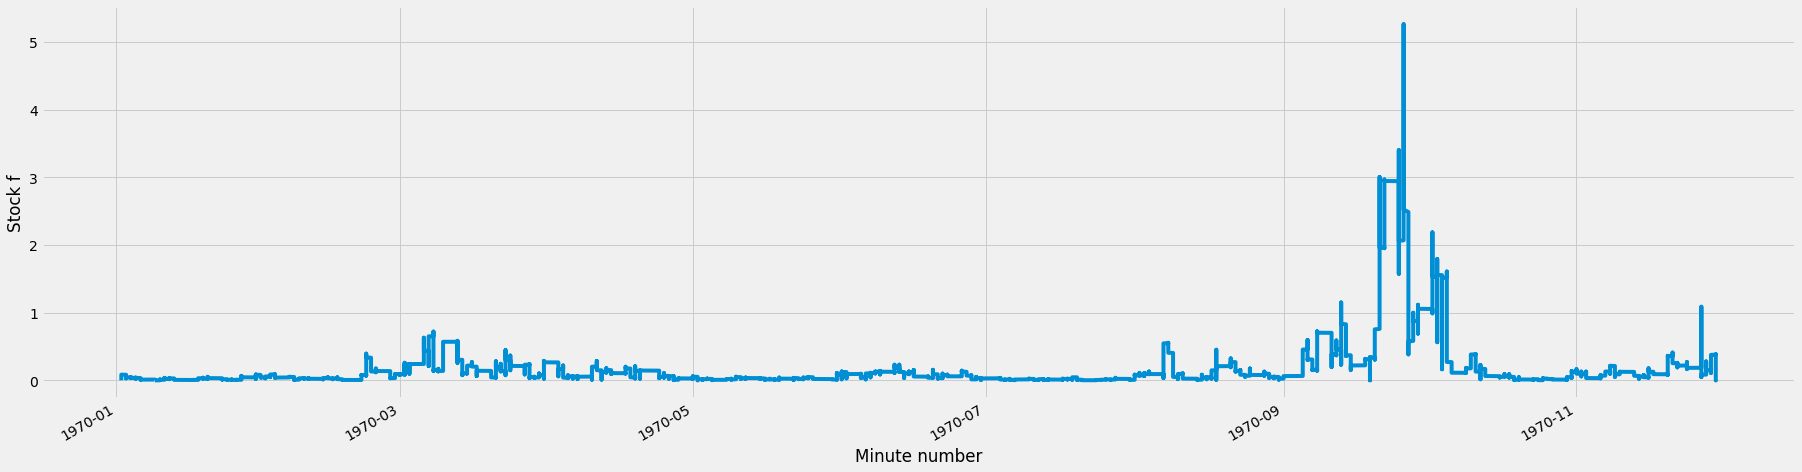

In [0]:
#@title Volatility in minutes

plist=["a", "b", "c", "d", "e","f"]

t_d = 391 #number of timesteps in a day, used for windowing
t_m = t_d*21 #number of timesteps in a month, used for shift in computing monthly log return
A_m = (df_new[plist].shift(-t_m)/ df_new[plist])**(12)-1
sigma_fine = A_m.rolling(t_d,min_periods=1).std()
sigma_fine.shape[0]==df_new.shape[0]
for stock in plist:
  plot_column(sigma_fine, stock)


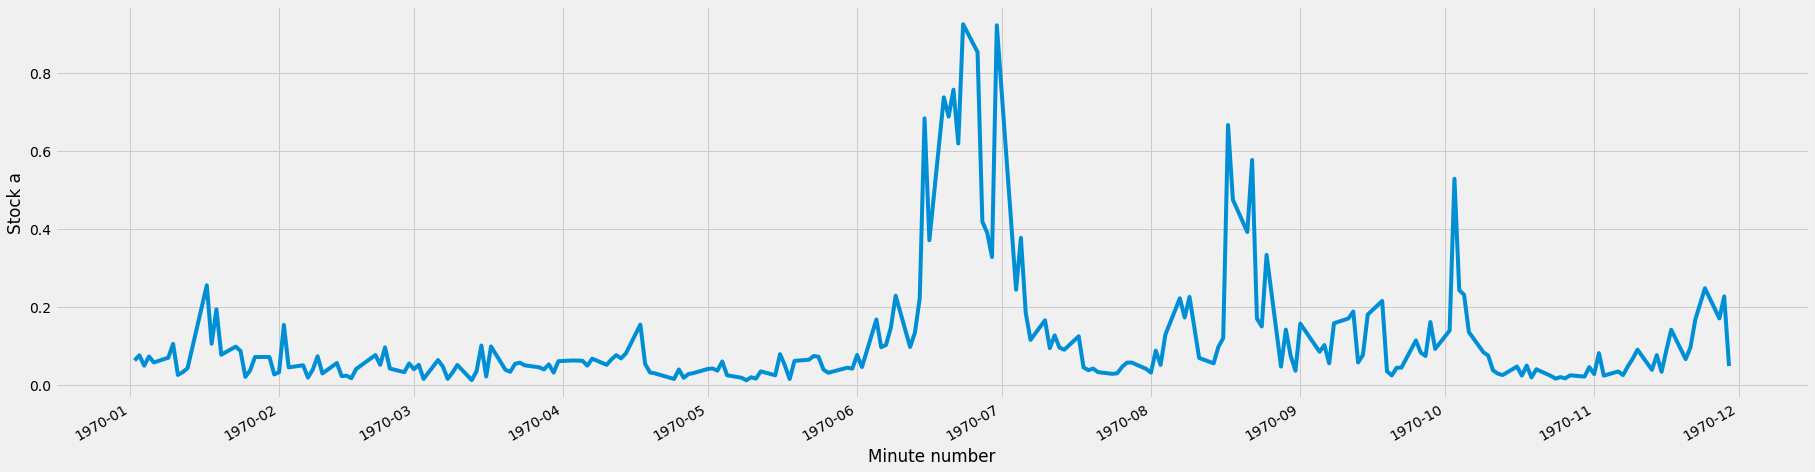

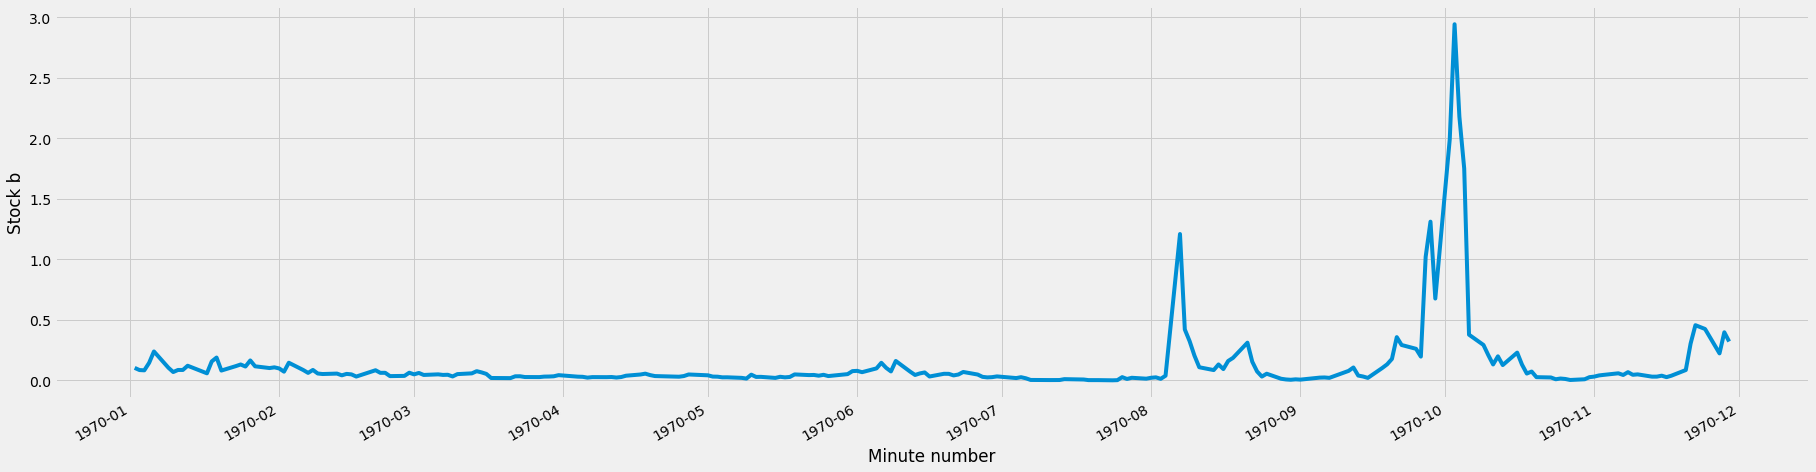

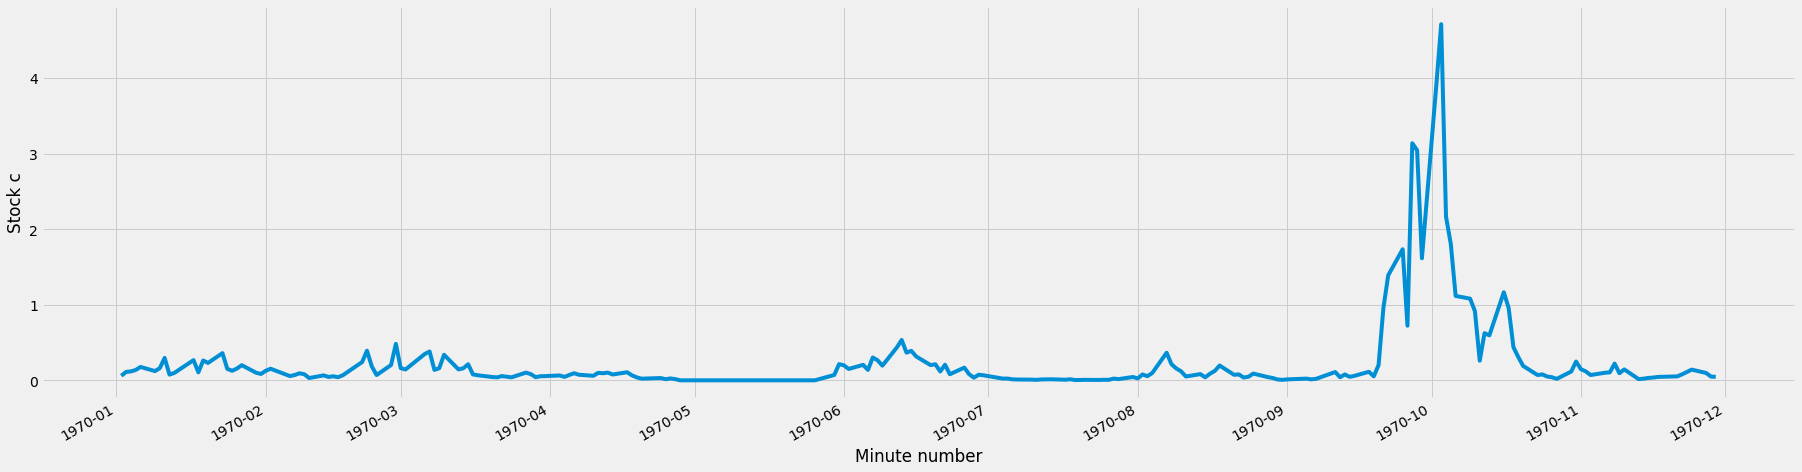

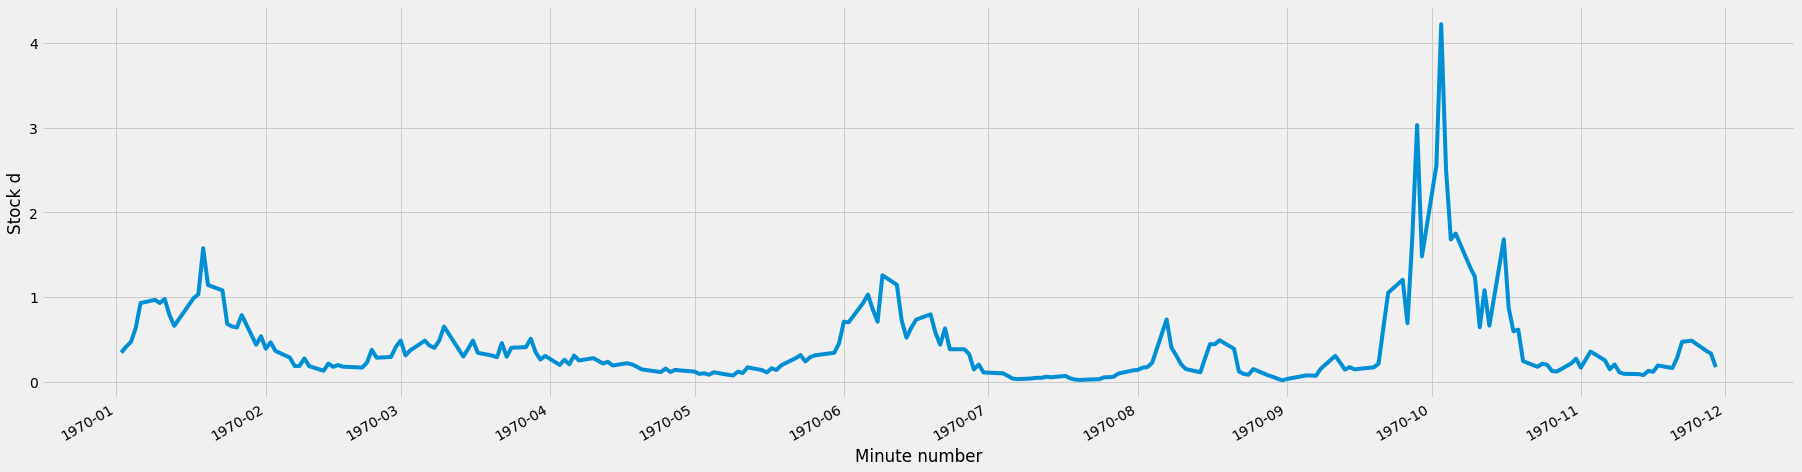

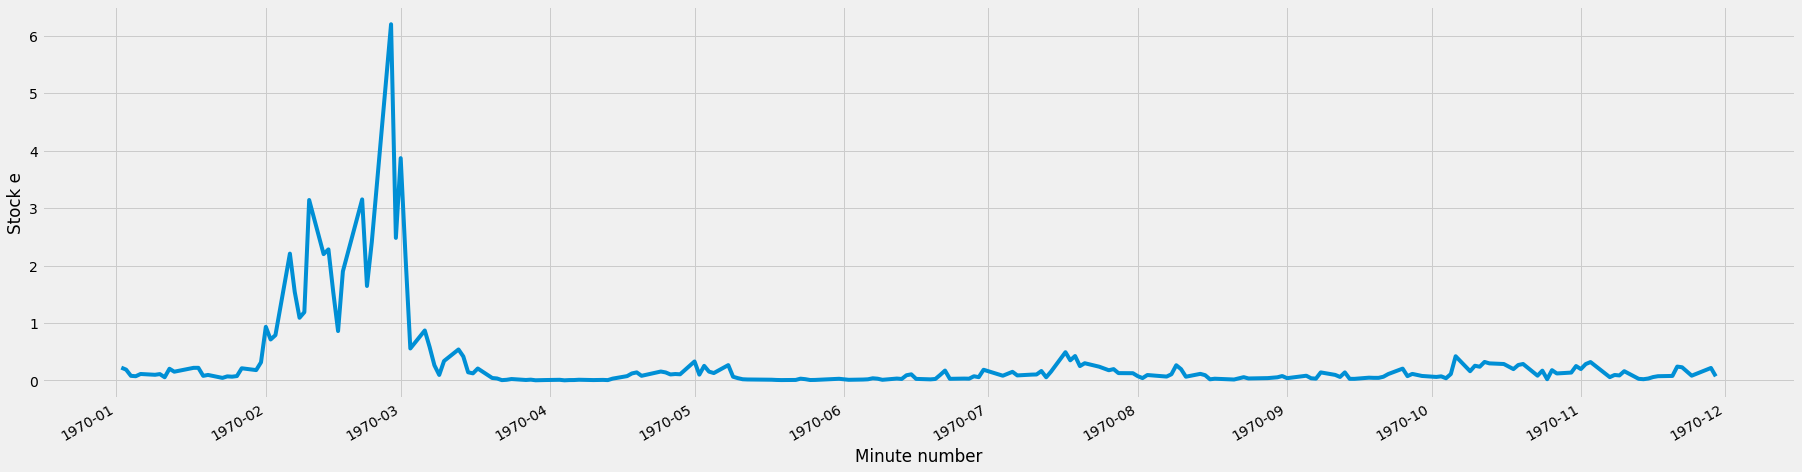

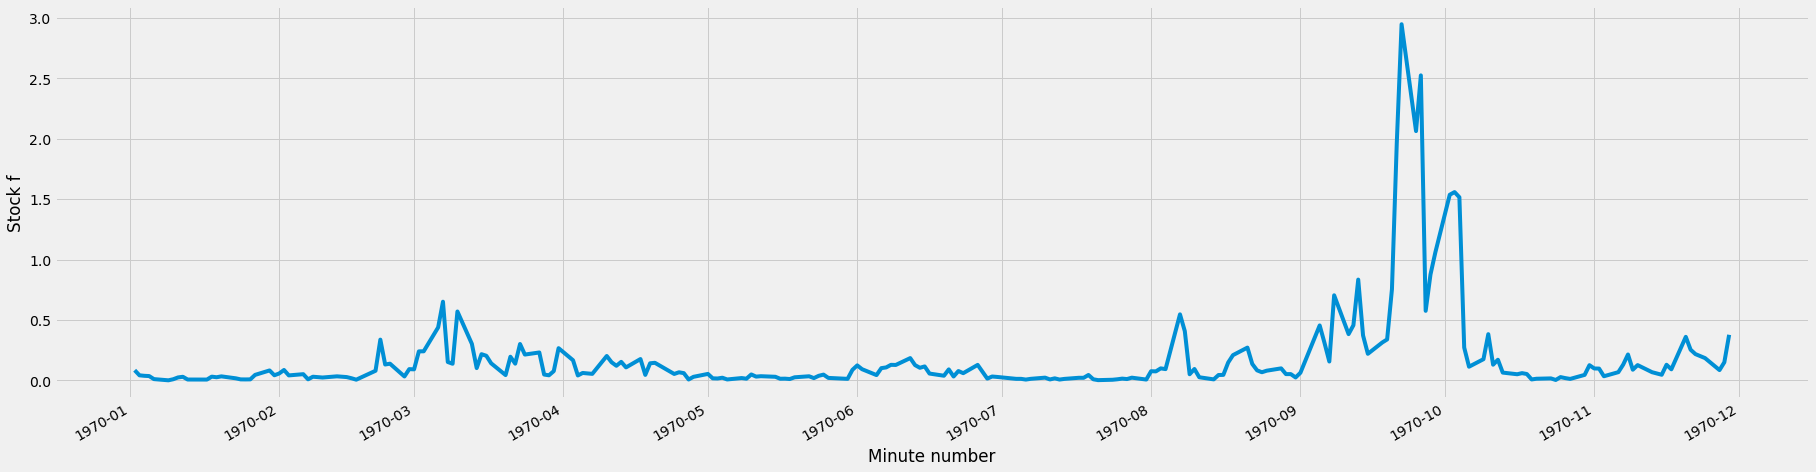

In [0]:
#@title Daily volatility 

sigma=pd.DataFrame(np.random.randn(len(A_m.index.unique()),6),columns=plist)
sigma.index=A_m.index.unique().copy()
for date in A_m.index.unique():
  for stock in plist:
    sigma.loc[sigma.index==date, stock]=A_m[A_m.index==date][stock].std(ddof=1,skipna=True)

for stock in plist:
  plot_column(sigma, stock)

In [0]:
#@title Final volatility dataset 
new_sigma = sigma[list("abcef")][:-21]
new_sigma.isnull().sum()

a    0
b    0
c    0
e    0
f    0
dtype: int64

## $\textbf{Part II. Statistical analysis and models}$



### $\textbf{Correlation analysis}$

Though it seems that there's no obvious correlation among the $6$ stocks, and some of them even behave like "noises". But fro the completeness of the report, we compute several different correlations ($\textbf{Naive correlation, Pearson correlation, local Pearson correlation, instantaneous phase synchronization}$) and related statistics in order to

- Test the validity of our observations (i.e. no two stocks are apprantly correlated).
- Chose source and target stocks for later machine learning(especially deep learning) models.

By doing so, we can get more understanding about the 'quality' and 'inner relations' of the data. If a stock (e.g. "b") has no explanatory power to the stock that we want to predict (e.g. "f"), then there is no need for us to use it in the training of our deep learning models. On the other hand, if one stock has higher-than-random correlations to another stock, then it's good to use one of them as the feature and the other as the target. In this case, $\textbf{to determine which stock volatility leads, and which stock volatility follows}$, we check the $\textbf{Dynamic time wrapping}$.

### Code and Examples

In [0]:
#@title ```correlation.py```

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")


import seaborn as sns
import scipy.stats as stats
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft

# For the dynamic_time_warping function
!pip install dtw
from dtw import dtw, accelerated_dtw


def pearson(df, feature1, feature2):
    """Compute and plot the overall pearson correlation of feature1 and feature2, 
    e.g. pearson(df, "b", "f") compute and plot the overall pearson correlation between the "Inflation" and the "Wage" columns

    :param: df, pandas.DataFrame, data contains different features (columns)
    :param: feature1, str, name of the column, e.g. "b"
    :param: feature2, str, name of another column e.g. "f"
    """
    overall_pearson_r = df.corr()[feature1][feature2]
    print(f"Pandas computed Pearson r: {overall_pearson_r}")
  
    
    r, p = stats.pearsonr(df.dropna()[feature1], df.dropna()[feature2])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")
    
    #Compute rolling window synchrony
    f,ax=plt.subplots(figsize=(14,3))
    df[[feature1, feature2]].rolling(window=30,center=True).median().plot(ax=ax)
    ax.set(xlabel='Time',ylabel='Pearson r')
    ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")


def local_pearson(df, feature1, feature2):
    """Compute and plot the local pearson correlation of feature1 and feature2, 
    e.g. local_pearson(df, "a", "b") compute and plot the local pearson correlation between the "Inflation" and the "Wage" columns

    :param: df, pandas.DataFrame, data contains different features (columns)
    :param: feature1, str, name of the column, e.g. "a"
    :param: feature2, str, name of another column e.g. "b"

    """
    # Set window size to compute moving window synchrony.
    r_window_size = 120
    # Interpolate missing data.
    df_interpolated = df[[feature1, feature2]].interpolate()
    # Compute rolling window synchrony
    rolling_r = df_interpolated[feature1].rolling(window=r_window_size, center=True).corr(df_interpolated[feature2])
    f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
    df[[feature1, feature2]].rolling(window=30,center=True).median().plot(ax=ax[0])
    ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
    rolling_r.plot(ax=ax[1])
    ax[1].set(xlabel='Frame',ylabel='Pearson r')
    plt.suptitle("Smiling data and rolling window correlation")


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def instant_phase_sync(df, feature1, feature2):
    """Compute and plot the instantaneous phase synchrony of feature1 and feature2, 
    e.g. instant_phase_sync(df, "a", "b") compute and plot the instantaneous phase synchrony between the "Inflation" and the "Wage" columns

    :param: df, pandas.DataFrame, data contains different features (columns)
    :param: feature1, str, name of the column, e.g. "a"
    :param: feature2, str, name of another column e.g. "b"
    """
    lowcut  = .01
    highcut = .5
    fs = 30.
    order = 1
    d1 = df[feature1].interpolate().values
    d2 = df[feature2].interpolate().values
    y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    
    al1 = np.angle(hilbert(y1),deg=False)
    al2 = np.angle(hilbert(y2),deg=False)
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    N = len(al1)

    # Plot results
    f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
    ax[0].plot(y1,color='r',label='y1')
    ax[0].plot(y2,color='b',label='y2')
    ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
    ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
    ax[1].plot(al1,color='r')
    ax[1].plot(al2,color='b')
    ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    ax[2].plot(phase_synchrony)
    ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
    plt.tight_layout()
    plt.show()



def dynamic_time_warping(df, feature1, feature2):
    """Compute and plot dynamic time warping of feature1 and feature2, 
    e.g. instant_phase_sync(df, "a", "b") compute and plot the dynamic_time_wraping between the "Inflation" and the "Wage" columns

    :param: df, pandas.DataFrame, data contains different features (columns)
    :param: feature1, str, name of the column, e.g. "a"
    :param: feature2, str, name of another column e.g. "b"
    """
    d1 = df[feature1].interpolate().values
    d2 = df[feature2].interpolate().values
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')


    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
    plt.show()

In [0]:
#@title Example: Naive correlation.
new_sigma.corr()

,a,b,c,e,f
a,1.000000,0.178992,0.124927,-0.139937,0.033105
b,0.178992,1.000000,0.864241,-0.064492,0.505138
c,0.124927,0.864241,1.000000,-0.031285,0.609643
e,-0.139937,-0.064492,-0.031285,1.000000,-0.069070
f,0.033105,0.505138,0.609643,-0.069070,1.000000


Pandas computed Pearson r: 0.12492677413179742
Scipy computed Pearson r: 0.12492677413179744 and p-value: 0.05797907566773995


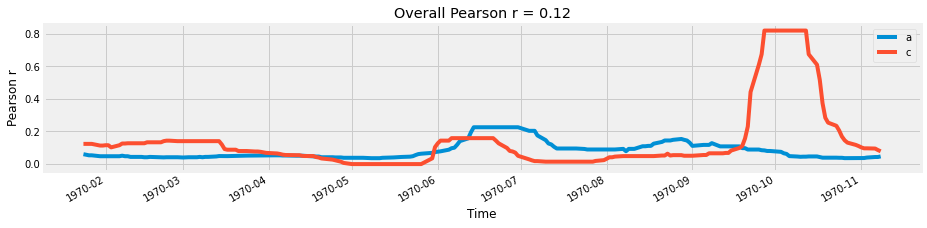

In [0]:
#@title Example: Pearson correlation
pearson(new_sigma, "a", "c")

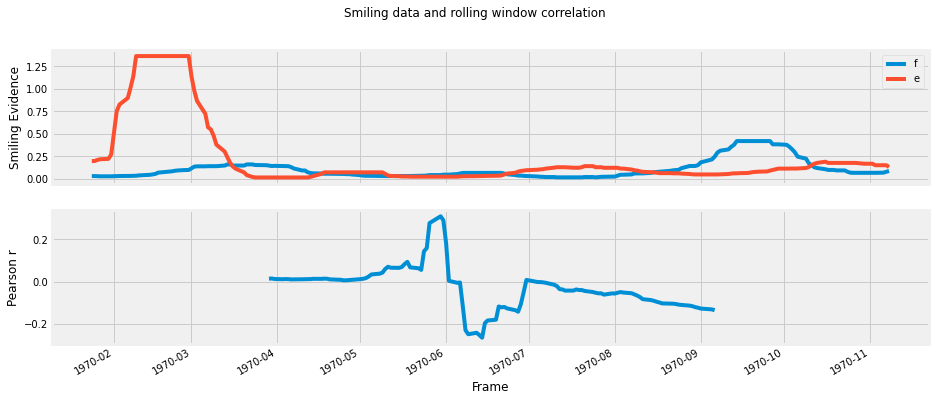

In [0]:
#@title Example: local Pearson correlation
local_pearson(new_sigma, "f", "e")

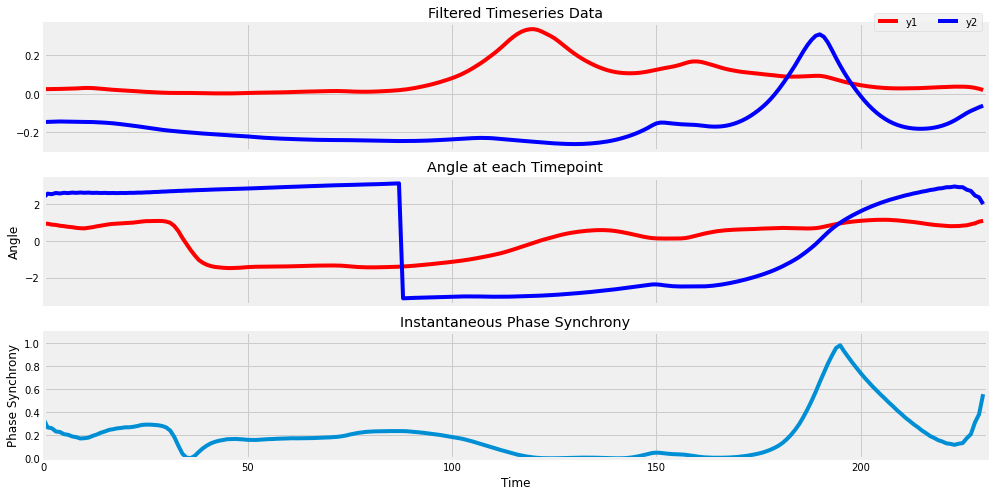

In [0]:
#@title Example: instantaneous phase synchronization
instant_phase_sync(new_sigma, "a", "b")

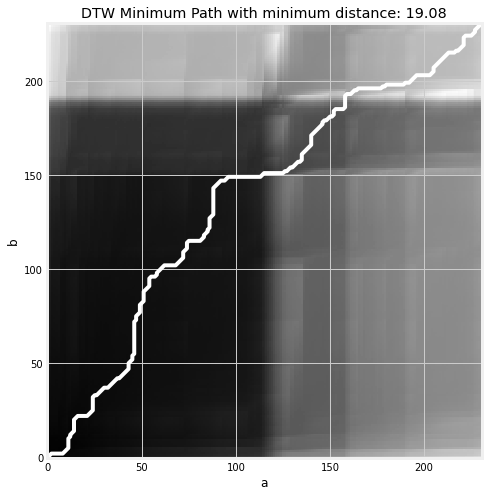

In [0]:
#@title Example: dynamic time wraping
dynamic_time_warping(new_sigma, "a", "b")

### Data analysis

Inspecting the correlations from different angles, we find

- $\textbf{Stock $b$ and stock $c$ have the highest correlation, 0.864241,}$ among all the pairs. 
- $\textbf{Stock $b$ and stock $f$}$, $\textbf{Stock $c$ and stock $f$}$ also have high positive correlation$.
- All other pairs have relatively low correlations. 

- $\textbf{Stock $b$ slightly leads stock $a$}$. 


We conclude that
- $\textbf{The assumption that no two stocks have apparent correlation is wrong}$.
- It's reasonable to $\textbf{use stock $a$ and stock $f$ as targets and the other stocks as source for forcasting by our analysis, we'll realize this in a multi-variant and multi-step LSTM model later}$. 

### $\textbf{Statistical models for predicting volatility}$

As we'll see below, some remarkable patterns (e.g. seasonality pattern) naturally appear in our data. To understand these patterns better,

- We visualize our data using $\textbf{time-series decomposition}$ that allows us to decompose our time series into three main components: trend, seasonality, and noise.
- We  $\textbf{train an ARIMA (Autoregressive Integrated Moving Average) model}$ to predict and forcast the future Volatility values. To get optimal output, we first
- Use $\textbf{grid search}$(in a range) to get the optimal parameters for the ARIMA mode.
- Fit arima models to predict next month's volatility

In [0]:
#@title ```time_series.py```


def plot_column(df, feature):
    """Plot the resampled column of df, e.g. plot_column(df, "Inflation") plots the "Inflation" column
    
    :param: df, pandas.DataFrame, the data, e.g. df = pd.read_excel("USMacroData", "All")
    :param: feature, str, name of column to be plotted. 
    """
    y = df[feature]
    y.plot(figsize=(15, 6))
    plt.show()


def plot_component(df, feature):
    """Decompose the time series data into trend, seasonal, and residual components.
    
    :param: df, pd.DataFram.
    :param: feature, str,column name/feature name we want to decompose
    :rtype: None
    """
    decomposition = sm.tsa.seasonal_decompose(df[feature], model='additive',freq=52)
    fig = decomposition.plot()
    plt.show()
    ###### This section uses ARIMA to analyze the data and make predictions.########################################

# Grid search to find the best ARIMA parameters 
def arima_parameters(df, feature, search_range=2):
    """Grid search for the optimal parameters of the Arima model for given data (df) and feature.
    :param: df, pdf.DataFrame, data
    :param: feature, str, feature name.
    :param: search_range, int, the range for the search of the parameters, the default value is 2
    """
    p = d = q = range(0, search_range)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    minimal_aic = 0
    optimal_param =[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df[feature],order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                if results.aic < minimal_aic:
                    optimal_param = [param, param_seasonal]
                    minimal_aic = results.aic
                    print(minimal_aic)
            except:
                continue
    print('\n Optimal parameters ARIMA{}x{}12 - Minimal AIC:{}'.format(optimal_param[0], optimal_param[1], minimal_aic))
    return optimal_param[0], optimal_param[1]


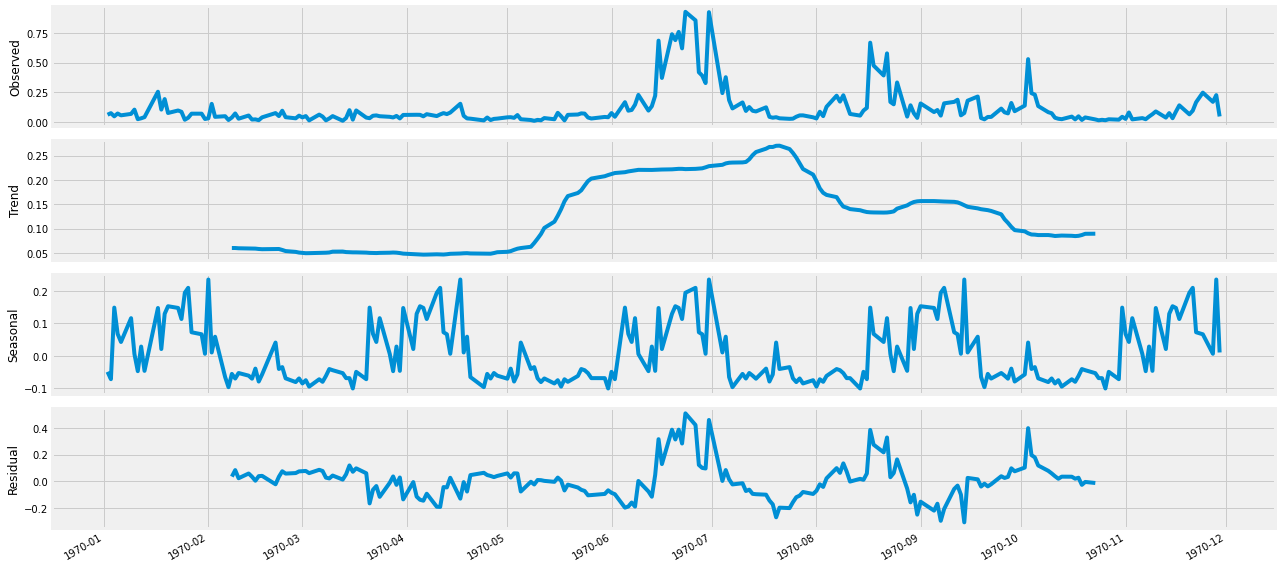

In [0]:
plot_component(new_sigma, "a")


In [0]:
arima_parameters(new_sigma, "a")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-90.39976752180513
-90.39976752180513
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-104.6220404675714
-104.6220404675714
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-37.93079196365547
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-121.41039301464231
-121.41039301464231
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-113.84340411735667
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-131.54236196798252
-131.54236196798252
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-57.495873873140084
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-114.54466043367323
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-208.70966183847128
-208.70966183847128
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-197.24167911716506
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-103.96001828398299
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-202.16848163063582
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-203.58604837770298
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-216.8758521946111
-216.8758521946111
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-135.47926852752335
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 -

((1, 0, 1), (0, 0, 0, 12))

In [0]:
arima_parameters(new_sigma, "b")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:170.07716662303517
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:171.4894723986554
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:295.99244410313185
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:167.97755357713928
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:171.0217094393121
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:171.14819938319445
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:240.35004513125935
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:173.81980273179033
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:0.021926806985391067
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10.470838674848721
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:133.4761652527779
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:21.584047009046785
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8.487974476915923
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11.552996030856292
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:89.06706505631814
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:28.263363670679496
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-91.04951798935619
-91.04951798935619
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 -

((1, 0, 0), (0, 0, 0, 12))

In [0]:
arima_parameters(new_sigma, "f")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:247.99757729220502
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:232.03747689037294
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:319.7137248769461
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:227.70141678387574
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:228.67377045275097
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:229.9117970732568
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:282.7315535157633
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:232.855001615836
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:107.84989948113763
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:101.16457643410824
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:193.51659680308134
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:111.53183486696223
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:98.19783457495264
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:101.34031670247452
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:166.7131597091078
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:115.64499685926572
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-20.169147903329332
-20.169147903329332
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - A

((1, 0, 0), (0, 0, 0, 12))

In [0]:
#@title imports
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [0]:
#@title model fit
a_model = sm.tsa.ARMA(new_sigma['a'].values,(1,0,1)).fit(disp=False)
b_model = sm.tsa.ARMA(new_sigma['b'].values,(1,0,0)).fit(disp=False)
f_model = sm.tsa.ARMA(new_sigma['f'].values,(1,0,0)).fit(disp=False)

In [0]:
#@title Model parameters
print(a_model.params)
print(b_model.params)
print(f_model.params)

[0.11561704 0.73469703]
[0.13240487 0.81177913]
[0.17833905 0.80715809]


In [0]:
#@title Model predictions
beg=len(new_sigma['a'].values)
predict_a = a_model.predict(start=beg,end=beg+21)
predict_b = b_model.predict(start=beg,end=beg+21)
predict_f = f_model.predict(start=beg,end=beg+21)
print(predict_a)
print(predict_b)
print(predict_f)

[0.06660579 0.07960862 0.08916176 0.09618043 0.10133702 0.10512555
 0.10790897 0.10995395 0.11145638 0.11256022 0.1133712  0.11396703
 0.11440478 0.1147264  0.11496269 0.11513629 0.11526384 0.11535754
 0.11542639 0.11547697 0.11551413 0.11554143]
[0.28566923 0.25682168 0.23340384 0.21439373 0.19896171 0.18643432
 0.17626485 0.16800949 0.16130796 0.15586779 0.15145158 0.14786659
 0.14495637 0.14259392 0.14067612 0.1391193  0.1378555  0.13682958
 0.13599676 0.13532069 0.13477187 0.13432635]
[0.3384968  0.30761167 0.28268249 0.26256071 0.24631924 0.23320981
 0.22262843 0.21408758 0.20719377 0.20162937 0.19713802 0.19351279
 0.19058666 0.18822481 0.18631842 0.18477966 0.18353764 0.18253514
 0.18172596 0.18107282 0.18054563 0.18012011]


### Data Analysis

- Components plot show the obvious seasonality, for example, for stock $a$, we can find an alternating pattern, namely, the volatility of $a$ alternate between high values and low values in a period of roughly $3-4$ months. 

- The optimal ARIMA parameters for "a" are ```(1, 0, 1)x(0, 0, 1, 12)```
-  As we forecast further out into the future, we becomes less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

- We'll do more carefully analysis of the predictions for the deep learning models.

## $\textbf{Part III. Deep learning models}$

### $\textbf{Basic model: single-step, single-feature forecasting with LSTM}$ 

$\textbf{Recurrent Neural Networks (RNNs)}$ are good fits for time-series analysis because RNNs keep record of historic data and they're designed to capture patterns developing through time.

However, vanilla RNNs have a major disadvantage---the vanishing gradient problem---"the changes the weights receive during training become so small, making the network unable to converge to a optimal solution. 

$\textbf{LSTM (Long-Short Term Memory)}$ is a variation of vanilla RNNS,it overcomes the vanishing gradiant (or gradiant explode) problem by clipping gradients if they exceed some constant bounds.

In this section, we will
- Process the data to fit the LSTM model
- $\textbf{Build and train the LSTM model for single-step, single-feature prediction}$ (e.g. we predict one stock's tomorrow volatility with only today's values of the other $5$ stocks). 

In [0]:
#@title imports
import math
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [0]:
#@title Data preparation

def transform_data(df, features, targets, look_back = 0, look_forward = 1, split_ratio = 0.7):
  """transform the data in a custom form.

  :param: df, pd.DataFram, the data, 
    e.g. df = pd.read_excel("USMacroData.xls", "All")
  :param: features, list of strs, the features to be uses as the source features,
     e.g. ["Wage", "Consumption"]
  :param: look_back, int, number of days to look back in historic data,
     e.g. look_back = 11 means we use the last (11+1)=12 months' data to predict the future
  :param:look_forward, int, num of days to look forward
    e.g. look_forward = 3 means we want to predict next 3 months' data
  :param: split_ratio, float, split the data into training dataset and testing dataset by this ratio
    e.g. split_ratio=0.7 means we use the first 70% of the data as training data, the last 30% as the testing dataset
  :rtype: np.arrays, x_train, y_train, x_test, y_test
  """
  x, y = [], []
  for i in range(look_back, len(df) - look_forward):
      assert look_back < len(df)-look_forward, "Invalid look_back, look_forward values"
      
      x.append(np.array(df[i-look_back : i+1][features]))
      y.append(np.array(df[i+1: i+look_forward+1][targets]).transpose())

  # List to np.arrary
  x_arr = np.array(x)
  y_arr = np.array(y)

  split_point = int(len(x)*split_ratio)

  return x_arr[0:split_point], y_arr[0:split_point], x_arr[split_point:], y_arr[split_point:]

features = ["a","b", "c", "e", "f"]
targets = ["a"]
x_train, y_train, x_test, y_test = transform_data(new_sigma, features=features, targets = targets, look_back = 0, look_forward=1, split_ratio=0.7)

#Note that all returned np.arrays are three dimensional.
#Need to reshape y_train and y_test to fit the LSTM

# For the basic model only
y_train = np.reshape(y_train, (y_train.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0], -1))

In [0]:
#@title Build and train the LSTM model

# To match the Input shape (1,5) and our x_train shape is very important. 

def train_model(Optimizer, x_train, y_train, x_test, y_test):
  model = Sequential()
  model.add(LSTM(50, input_shape=(1, 5)))
  model.add(Dense(1))

  model.compile(loss="mean_squared_error", optimizer=Optimizer, metrics =["accuracy"])
  scores = model.fit(x=x_train,y=y_train, batch_size=1, epochs = 100, validation_data = (x_test, y_test))

  return scores, model


In [0]:
#@title Make sure data forms are correct
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(161, 1, 5)
(161, 1)
(69, 1, 5)
(69, 1)


In [0]:
#@title LSTM with SGD, RMSprop, Adam optimizers, epochs = 100
#SGD_score, SGD_model = train_model(Optimizer = "sgd", x_train=x_train, y_train = y_train, x_test =x_test, y_test=y_test)
RMSprop_score, RMSprop_model = train_model(Optimizer = "RMSprop", x_train=x_train, y_train = y_train, x_test =x_test, y_test=y_test)
#Adam_score, Adam_model = train_model(Optimizer = "adam", x_train=x_train, y_train = y_train, x_test =x_test, y_test=y_test)

Train on 161 samples, validate on 69 samples
Epoch 1/100
161/161 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0000e+00
Epoch 2/100
161/161 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.0000e+00 - val_loss: 0.0330 - val_accuracy: 0.0000e+00
Epoch 3/100
161/161 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.0000e+00 - val_loss: 0.0362 - val_accuracy: 0.0000e+00
Epoch 4/100
161/161 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.0000e+00 - val_loss: 0.0306 - val_accuracy: 0.0000e+00
Epoch 5/100
161/161 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.0000e+00 - val_loss: 0.0707 - val_accuracy: 0.0000e+00
Epoch 6/100
161/161 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.0000e+00 - val_loss: 0.0538 - val_accuracy: 0.0000e+00
Epoch 7/100
161/161 [============================

In [0]:
#@title Plot result

def plot_result(score, optimizer_name, label = "loss"):
  plt.figure(figsize=(18, 8))
  plt.plot(range(1, 101), score.history["loss"], label ="Training Loss")
  plt.plot(range(1,101), score.history["val_loss"], label="Validation Loss")
  plt.axis([1,100, 0, 0.2])
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Train and Validation Loss using "+optimizer_name + "optimizer")
  plt.legend()
  plt.show()


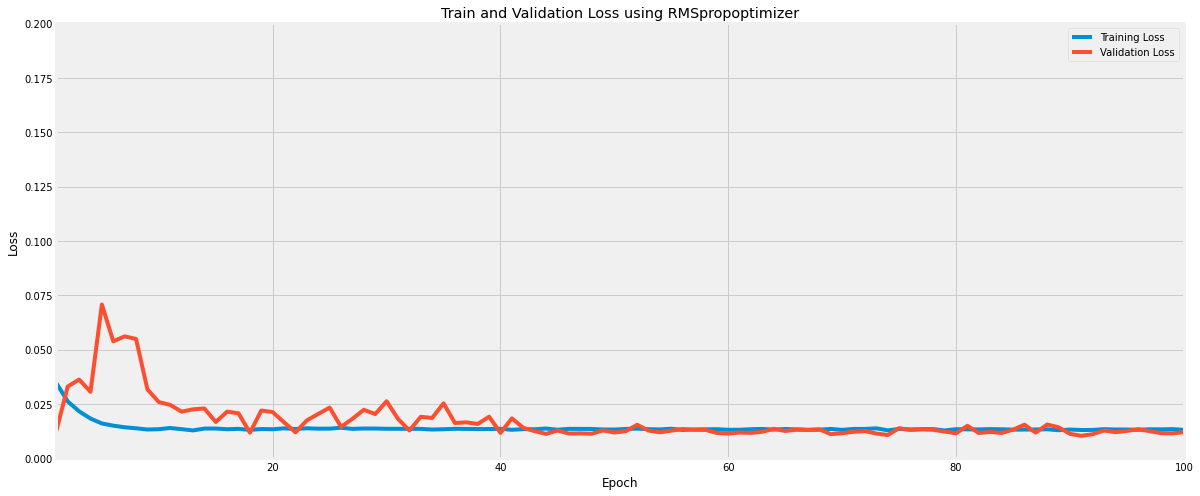

In [0]:
#@title Plot result
plot_result(RMSprop_score, "RMSprop")

In [0]:
#@title Plot predictions
def plot_predict(model, x_train, x_test, y_train, y_test):
  train_predict = RMSprop_model.predict(x_train)
  test_predict = RMSprop_model.predict(x_test)

  # Calculate root mean squared error.
  trainScore = math.sqrt(mean_squared_error(y_train, train_predict))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(y_test, test_predict))
  print('Test Score: %.2f RMSE' % (testScore))

  plt.figure(figsize=(18, 8))
  plt.plot(train_predict)
  plt.plot(y_train)
  plt.show()
  
  plt.figure(figsize=(18, 8))
  plt.plot(test_predict)
  plt.plot(y_test)
  plt.show()


Train Score: 0.11 RMSE
Test Score: 0.11 RMSE


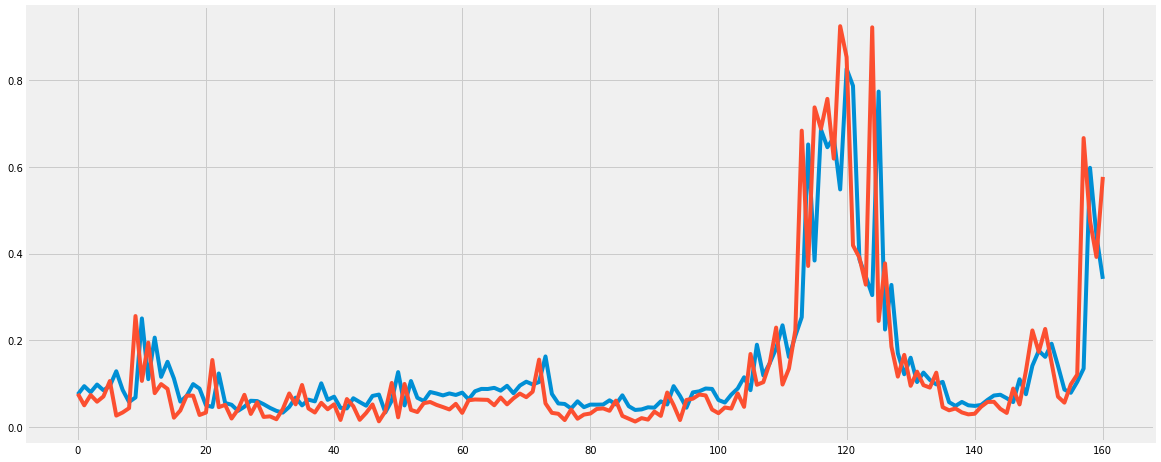

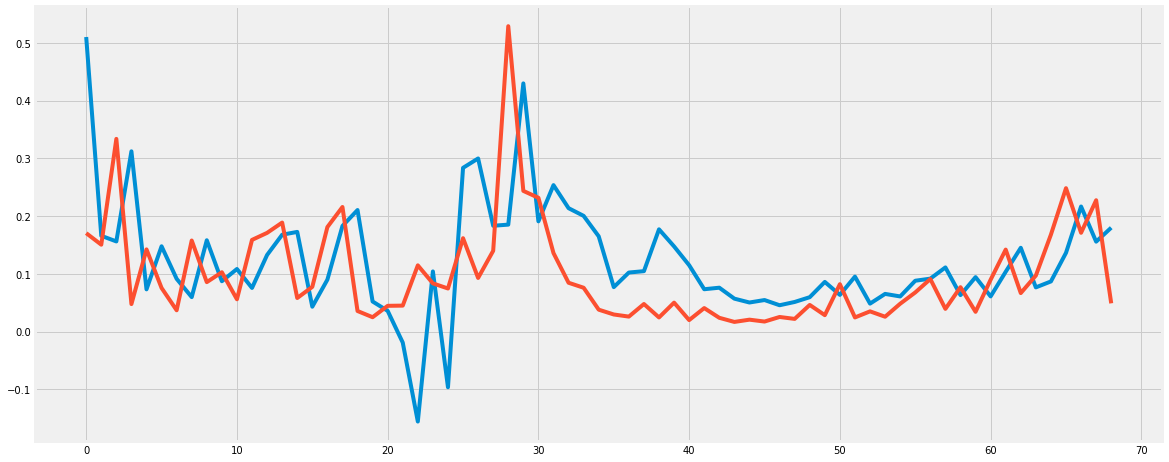

In [0]:
#@title Plot predictions
plot_predict(RMSprop_model, x_train = x_train, y_train=y_train, x_test = x_test, y_test=y_test)

### Data Analysis

We only trained the model for 100 epochs, feel free to modify it to any number as long as we have enough computing power. Here are some results we find during the experiments

- LSTM with Adam or RMSprop optimizers work better than the SGD optimizer in this project.
- Each model fits the training dataset very well.
- $\textbf{The prediction captures the range and characteristics of the real data}$.
- Most importantly, the model predict the large rises or drops in the volatility before they happen, which is very important in real investments. 




### $\textbf{Generalized model: multi-step, multi-feature forecasting with LSTM}$

We build a multi-step, multi-feature LSTM model in this section. That means we can use several-day's data to predict multiple days and multiple features in the future. $\textbf{For example, we can use last 12-day's data of a, b, c, f to predict next three-day's values of a and f}$. In this section, we 

- Process the data to fit the requirements of all possible multi-step, multi-feature prediction task.
- We modify the LSTM model accordingly.
- Plot the 3-day prediction for $a$ and $f$ with last 12-day's data of $a$, $b$, $c$ and $f$.

In [0]:
#@title Data preparation

def transform_data(df, features, targets, look_back = 0, look_forward = 1, split_ratio = 0.7):
  """transform the data in a custom form.

  :param: df, pd.DataFram, the data, 
    e.g. df = pd.read_excel("USMacroData.xls", "All")
  :param: features, list of strs, the features to be uses as the source features,
     e.g. ["Wage", "Consumption"]
  :param: look_back, int, number of days to look back in historic data,
     e.g. look_back = 11 means we use the last (11+1)=12 months' data to predict the future
  :param:look_forward, int, num of days to look forward
    e.g. look_forward = 3 means we want to predict next 3 months' data
  :param: split_ratio, float, split the data into training dataset and testing dataset by this ratio
    e.g. split_ratio=0.7 means we use the first 70% of the data as training data, the last 30% as the testing dataset
  :rtype: np.arrays, x_train, y_train, x_test, y_test
  """
  x, y = [], []
  for i in range(look_back, len(df) - look_forward):
      assert look_back < len(df)-look_forward, "Invalid look_back, look_forward values"
      
      x.append(np.array(df[i-look_back : i+1][features]))
      y.append(np.array(df[i+1: i+look_forward+1][targets]).transpose())

  # List to np.arrary
  x_arr = np.array(x)
  y_arr = np.array(y)

  split_point = int(len(x)*split_ratio)

  return x_arr[0:split_point], y_arr[0:split_point], x_arr[split_point:], y_arr[split_point:]

features = ["a", "b", "c", "f"]
targets = ["a", "f"]
x_train, y_train, x_test, y_test = transform_data(new_sigma, features=features, targets = targets, look_back = 11, look_forward=3, split_ratio=0.7)

#Note that all returned np.arrays are three dimensional.
#Need to reshape y_train and y_test to fit the LSTM

# For the multi-step LSTM model only
y_train = np.reshape(y_train, (y_train.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0], -1))

In [0]:
#@title Make the data forms are all correct
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(151, 12, 4)
(151, 6)
(66, 12, 4)
(151, 6)


In [0]:
#@title Scaling, vectorize and de_vectorize

def scale(arr, df):
  """Scale the data to range (-1,1) to better fit the LSTM model

  :param: arr, np.array, the array to be scaled
  :param: df, pd.DataFrame, to provide the max and min for us to scale arr
  TODO: maybe we don't need the df parameter?
  """
  global_max = max(df.max())
  global_min = min(df.min())
  arr = -1 + (arr-global_min)*2/(global_max-global_min)
  return arr

def de_scale(arr, df):
  """de Scale the data from range (-1,1) to its original range

  :param: arr, np.array, the array to be scaled
  :param: df, pd.DataFrame, to provide the max and min for us to scale arr
  """
  global_max = max(df.max())
  global_min = min(df.min())
  arr = global_min+(arr+1)*(global_max-global_min)/2
  return arr

def vectorize(y_train):
  """To vectorize an np.array.

  :param: y_train, np.array, the array to be vectorized
  :rtype: np.array, vectorized array.
  """
  return np.reshape(y_train, (y_train.shape[0], -1))

def de_vectorize(y_train, row, col):
  """To de_vectorize an np.array: transfrom from 2-dim np.array to its original form.

  :param: y_train, np.array, the array to be de_vectorized
  :rtype: np.array, de_vectorized array.
  """
  return np.reshape(y_train,(y_train.shape[0], row, col))

In [0]:
#@title model training
def train_multi_step_model(Optimizer, x_train, y_train, x_test, y_test):
  model = Sequential()
  model.add(LSTM(50, input_shape=(12, 4)))
  model.add(Dense(6))

  model.compile(loss="mean_squared_error", optimizer=Optimizer, metrics =["accuracy"])
  scores = model.fit(x=x_train,y=y_train, batch_size=1, epochs = 200, validation_data = (x_test, y_test))

  return scores, model


In [0]:
#@title Train the model. Change the optimizer parameter to use other optimizers, e.g. "adams"
RMS_score, RMS_model = train_multi_step_model(Optimizer = "RMSprop", x_train=x_train, y_train = y_train, x_test =x_test, y_test=y_test)

Train on 151 samples, validate on 66 samples
Epoch 1/200
151/151 [==============================] - 1s 7ms/step - loss: 0.0190 - accuracy: 0.2053 - val_loss: 0.2222 - val_accuracy: 0.1818
Epoch 2/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0156 - accuracy: 0.2318 - val_loss: 0.2298 - val_accuracy: 0.2121
Epoch 3/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0144 - accuracy: 0.2384 - val_loss: 0.2388 - val_accuracy: 0.2727
Epoch 4/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0140 - accuracy: 0.2450 - val_loss: 0.3042 - val_accuracy: 0.2576
Epoch 5/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0132 - accuracy: 0.2649 - val_loss: 0.3327 - val_accuracy: 0.2273
Epoch 6/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0123 - accuracy: 0.2914 - val_loss: 0.3793 - val_accuracy: 0.2273
Epoch 7/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0120 - accuracy: 0.2

In [0]:
#@title Make predictions with the trained model

train_predict = RMS_model.predict(x_train)
test_predict = RMS_model.predict(x_test)

#test_predict = SGD_model.predict(x_test)
#test_predict = de_scale(test_predict, df)
#y_origin =de_scale(y_test, df)


In [0]:
#@title Plot Multi-step, Multi-feature predictions.
def predict_plot(df, y_predict, targets):
  """ Plot the multi-step, multi-result predictions.

  :param: df, pd.DataFrame, e.g. df = pd.read_excel("USMacroData.xls", "All")
  :param: y_predict, 2-dim np.array, the model-predicted values, in each row, it has look_forward*(number of target features) elements.
          In our example, look_forward = 3, number of target features =2 ("Inflation", "Unemployment").
  :param: targets, list, target features, e.g ["Inflation", "Unemployment"]
  """

  y_predict = de_vectorize(y_predict, 2, 3)
  assert y_predict.shape[1] == len(targets), "Incompatible size of targets and dataset"
  assert df.shape[0] == y_predict.shape[0], "Incompatible original data rows and y_predict rows"
  
  look_forward = y_predict.shape[2]

  for index, target in enumerate(targets):
    plt.figure(figsize=(17, 8))
    plt.plot(df[0:12][target])
    for i in range(len(y_predict)):
      y = list(y_predict[i][index])
      x = list(df.index[i: i+look_forward])
      data = pd.DataFrame(list(zip(x, y)), columns =[df.index.name, target]) 
      data = data.sort_values(df.index.name)
      data.set_index(df.index.name, inplace=True)

      if i < 12:
        plt.plot(df[i: i+look_forward][target])
        plt.plot(data)
        plt.xlabel("Date")
        plt.ylabel(target)
        plt.title("3-month predictions of " + target)
    plt.show()


In [0]:
new_sigma.index.name="day"
new_sigma[165:][["a", "f"]].index.name

'day'

### To read to graph below

- Each short line segment is a 3-day prediction: start, middle, end point of the line segment means the prediction for the next 1, 2, 3 day's data respectively.
- X axies are the data.
- The long line is the real data.

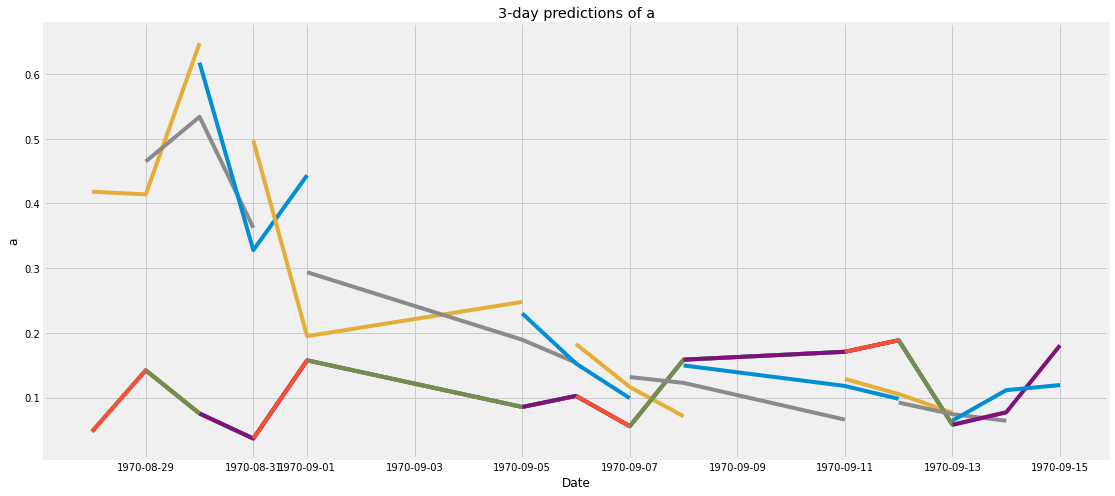

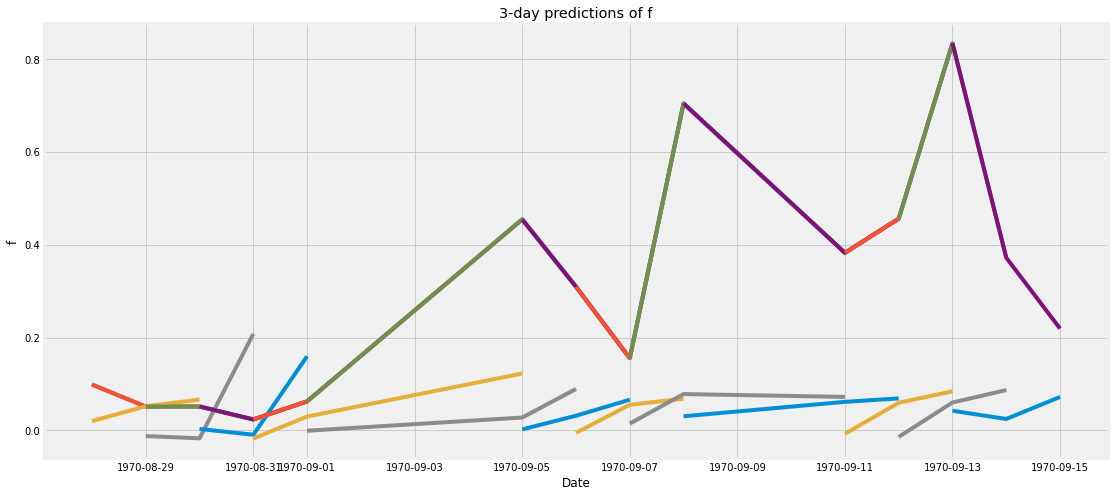

In [0]:
#@title Plot predictions
y_predict = de_vectorize(test_predict, 2, 3)
y_predict.shape
y_predict.shape[1] == len(targets)
new_sigma[165:][["a", "f"]].shape[0] == y_predict.shape[0]
look_forward = y_predict.shape[2]

for index, target in enumerate(targets):
  plt.figure(figsize=(17, 8))
  plt.plot(new_sigma[165:][["a", "f"]][0:12][target])
  for i in range(len(y_predict)):
    y = list(y_predict[i][index])
    x = list(new_sigma[165:][["a", "f"]].index[i: i+look_forward])
    data = pd.DataFrame(list(zip(x, y)), columns =[new_sigma[165:][["a", "f"]].index.name, target]) 
    data = data.sort_values(new_sigma[165:][["a", "f"]].index.name)
    data.set_index(new_sigma[165:][["a", "f"]].index.name, inplace=True)
    
    if i < 12:
      plt.plot(new_sigma[165:][["a", "f"]][i: i+look_forward][target])
      plt.plot(data)
      plt.xlabel("Date")
      plt.ylabel(target)
      plt.title("3-day predictions of " + target)
  plt.show()

### Data Analysis

Though the dataset is not big enough, we still successfully capture several features in the prediction

- $\textbf{Model predictions shows similar trend as the real data}$, e.g. from the predicted $f$ data above, the predicted values are more or less in the most correct range and goes in the same direction as the real data.
- $\textbf{The model captures the range of the real data very precisely}$.
- $\textbf{All 3-day predictions are liquid}$, which means the modell successfully captures the local behavior of the volatility.

### $\textbf{Advanced model: Generative Adversarial Network (GAN) with RNN and CNN}$

$\textbf{Generative Adversarial Networks (GAN)}$ have been a successful model in generating realistic images, paintings, and videos. $\textbf{The idea that GANs can to used to predict time-series data is new and experimental}$. We know GANs are powerful in learning characteristics of data, our model is based on the $\textbf{assumptions}$.
- Values of a $\textbf{feature has certain patterns}$ and behavior (characteristics).
- $\textbf{The future values of a feature should follow more or less the same pattern or behavior}$ (unless it starts operating in a totally different way, or the economy drastically changes).

Our $\textbf{goal}$ is that 
- Generate future data that has similar (surely not exactly the same) distribution as the historical data. 

In our model, we use 
- $\textbf{LSTM as a time-series generator}$.
- $\textbf{1-dimensional CNN as a discriminator}$.

In [0]:
#@title imports

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LSTM, Conv1D, MaxPool1D, BatchNormalization, Reshape, Flatten


In [0]:
#@title Data preparation

#@title Data preparation

def transform_data(df, features, targets, look_back = 0, look_forward = 1, split_ratio = 0.7):
  """transform the data in a custom form.

  :param: df, pd.DataFram, the data, 
    e.g. df = pd.read_excel("USMacroData.xls", "All")
  :param: features, list of strs, the features to be uses as the source features,
     e.g. ["Wage", "Consumption"]
  :param: look_back, int, number of days to look back in historic data,
     e.g. look_back = 11 means we use the last (11+1)=12 months' data to predict the future
  :param:look_forward, int, num of days to look forward
    e.g. look_forward = 3 means we want to predict next 3 months' data
  :param: split_ratio, float, split the data into training dataset and testing dataset by this ratio
    e.g. split_ratio=0.7 means we use the first 70% of the data as training data, the last 30% as the testing dataset
  :rtype: np.arrays, x_train, y_train, x_test, y_test
  """
  x, y = [], []
  for i in range(look_back, len(df) - look_forward):
      assert look_back < len(df)-look_forward, "Invalid look_back, look_forward values"
      
      x.append(np.array(df[i-look_back : i+1][features]))
      y.append(np.array(df[i+1: i+look_forward+1][targets]).transpose())

  # List to np.arrary
  x_arr = np.array(x)
  y_arr = np.array(y)

  split_point = int(len(x)*split_ratio)

  return x_arr[0:split_point], y_arr[0:split_point], x_arr[split_point:], y_arr[split_point:]

features = ["a","c","e", "f"]
targets = ["a", "b"]
x_train, y_train, x_test, y_test = transform_data(new_sigma, features=features, targets = targets, look_back = 11, look_forward=3, split_ratio=0.7)

#Note that all returned np.arrays are three dimensional.
#Need to reshape y_train and y_test to fit the LSTM

# For the multi-step LSTM model only
y_train = np.reshape(y_train, (y_train.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0], -1))

In [0]:
#@title Make sure all data forms are as what we want

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(151, 12, 4)
(151, 6)
(66, 12, 4)
(66, 6)


### Model architecture: LSTM generator

It's a 1-layer LSTM model.
- 50 hidden layers of LSTM cells
- 1 dense layer with 6 (2*3) dimensional output, since we have 2 features and 3 months to predict.



In [0]:
#@title Create generator
def create_generator():
  generator = Sequential()
  generator.add(LSTM(50, input_shape=(12,4)))
  generator.add(Dense(6))
  generator.compile(loss="mean_squared_error", optimizer="RMSprop", metrics=["accuracy"])

  return generator

generator = create_generator()
generator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 306       
Total params: 11,306
Trainable params: 11,306
Non-trainable params: 0
_________________________________________________________________


### Model architecture: CNN discriminator

The structure of the discriminator is given by 
- Reshape layer. Each row in y_train is acturally 1-dimensional (6,), which is different from (6,1)!
- 1-dimensional Convolutional layer with 32, 3$\times$1 filters to capture the characteristics of 3-month real data.
- LeakyReLU layer
- Dropout layer. Random reconfigurate 10% of the weights to zero to prevent overfitting.
- 1-dimensional Convolutional layer with 64, 3$\times$1 filters to capture more characteristics of the real date.
- Batchnormalization layer. To normalize the data.
- 1 Dense layer with 50 hidden nets.
- Dropout layer.
- 1 Dense layer with 1 net. 


In [0]:
#@title Create discriminator
# CNN discriminator, Learn the distribution of the price.
# The goal of the gan model is to study the "characteristics" of, for example, the "Inflation" rate.
# The generator tries to generate "Inflation" data as real as possible based on the other features, e.g "Unempolyment", "Wage", etc.
FILTER_SIZE = 3
NUM_FILTER = 32
INPUT_SIZE = 3 # num of days we want to predict
MAXPOOL_SIZE = 1 # our data set is small, so we don't even need it 
BATCH_SIZE = 1 # our data set is small, we don't need large batch size
STEP_PER_EPOCH = 612//BATCH_SIZE 
EPOCHS = 10


def create_discriminator():
  discriminator = Sequential()
  discriminator.add(Reshape((6,1), input_shape=(6,)))
  discriminator.add(Conv1D(NUM_FILTER, FILTER_SIZE, input_shape = (6,1)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.1))
  discriminator.add(Conv1D(2*NUM_FILTER, FILTER_SIZE))
  discriminator.add(BatchNormalization())

  discriminator.add(Dense(units=50))
  discriminator.add(Dropout(0.1))
  
  #reduce the dimension of the model to 1
  discriminator.add(Flatten())

  discriminator.add(Dense(units=1, activation="sigmoid"))

  discriminator.compile(loss="mean_squared_error", optimizer="RMSprop")
  return discriminator

discriminator = create_discriminator()
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 6, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 32)             128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 64)             6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 64)             256       
_________________________________________________________________
dense_10 (Dense)             (None, 2, 50)           

In [0]:
#@title Create a GAN model with LSTM as the generator and CNN as the discriminator
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(12,4))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='mean_squared_error', optimizer='adam')
    return gan
gan = create_gan(discriminator, generator)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 4)             0         
_________________________________________________________________
sequential_9 (Sequential)    (None, 6)                 11306     
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 9943      
Total params: 21,249
Trainable params: 11,306
Non-trainable params: 9,943
_________________________________________________________________


In [0]:
#@title Training function for the entangled GAN model
def training(x_train, y_train, x_test, y_test, epochs=1, random_size=128):
    
    #Loading the data
    random_count = 4*x_train.shape[0] / random_size
    
    # Creating GAN
    generator= create_generator()

    #y_lstm = np.reshape(y_train, (y_train.shape[0],1))
    #scores = generator.fit(x=x_train,y=y_lstm, batch_size=1, epochs = 100, validation_data = (x_test, y_test))
    #plt.plot(generator.predict(x_train))
    #plt.plot(y_lstm)
    #plt.show()


    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for index in tqdm(range(random_size)):
        #generate  random noise as an input  to  initialize the  generator
            feature = x_train[np.random.randint(low=0,high=x_train.shape[0],size=random_size),:]
            
            # Generate fake MNIST images from noised input
            fake_money = generator.predict(feature)
            #print(fake_money)
            #print(fake_money.shape)
            # Get a random set of  real images

            #real_money =y_train[np.random.randint(low=0,high=y_train.shape[0],size=random_size),:]
            upper_bound = int(np.random.randint(low=random_size, high=y_train.shape[0], size=1))

            real_money = y_train[upper_bound-random_size: upper_bound]

            real_money = np.reshape(real_money, (real_money.shape[0],6))
            #print(real_money)
            #print(real_money.shape)
            
            #Construct different batches of  real and fake data 
            combination = np.concatenate([real_money, fake_money])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*random_size)
            y_dis[:random_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(combination, y_dis)
            
            #Tricking the noised input of the Generator as real data
            trick_feature = x_train[np.random.randint(low=0,high=x_train.shape[0],size=random_size),:]
            y_gen = np.ones(random_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(trick_feature, y_gen)
            
        if e == 1 or e % 20 == 0:
          #plot generator_predict(x_test) and y_test on the same graph
          plt.figure(figsize=(17,8))
          plt.plot(generator.predict(x_train))
          y_plot = np.reshape(y_train, (y_train.shape[0],6))
          plt.plot(y_plot)
          plt.show()

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 128/128 [00:05<00:00, 23.11it/s]


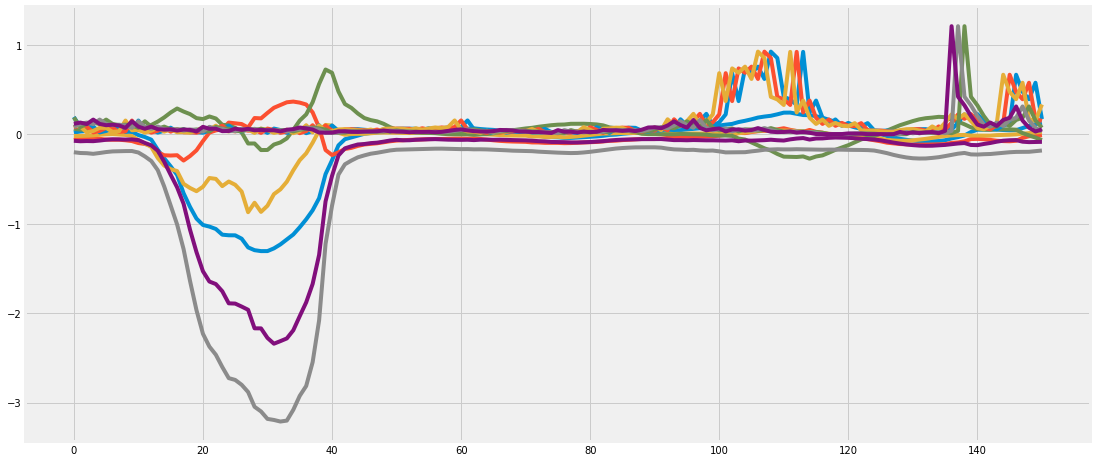

  3%|▎         | 4/128 [00:00<00:03, 37.64it/s]

Epoch 2


  4%|▍         | 5/128 [00:00<00:03, 40.91it/s]

Epoch 3


  3%|▎         | 4/128 [00:00<00:03, 38.84it/s]

Epoch 4


  3%|▎         | 4/128 [00:00<00:03, 32.14it/s]

Epoch 5


  3%|▎         | 4/128 [00:00<00:03, 38.94it/s]

Epoch 6


  3%|▎         | 4/128 [00:00<00:03, 39.50it/s]

Epoch 7


  4%|▍         | 5/128 [00:00<00:02, 43.49it/s]

Epoch 8


  3%|▎         | 4/128 [00:00<00:03, 36.87it/s]

Epoch 9


  4%|▍         | 5/128 [00:00<00:02, 42.18it/s]

Epoch 10


  4%|▍         | 5/128 [00:00<00:03, 39.72it/s]

Epoch 11


  3%|▎         | 4/128 [00:00<00:03, 38.11it/s]

Epoch 12


  4%|▍         | 5/128 [00:00<00:02, 41.90it/s]

Epoch 13


  4%|▍         | 5/128 [00:00<00:02, 44.00it/s]

Epoch 14


  4%|▍         | 5/128 [00:00<00:02, 41.53it/s]

Epoch 15


  3%|▎         | 4/128 [00:00<00:03, 38.51it/s]

Epoch 16


  4%|▍         | 5/128 [00:00<00:02, 42.41it/s]

Epoch 17


  4%|▍         | 5/128 [00:00<00:02, 42.56it/s]

Epoch 18


  4%|▍         | 5/128 [00:00<00:02, 42.77it/s]

Epoch 19


  4%|▍         | 5/128 [00:00<00:02, 41.28it/s]

Epoch 20


100%|██████████| 128/128 [00:03<00:00, 41.24it/s]


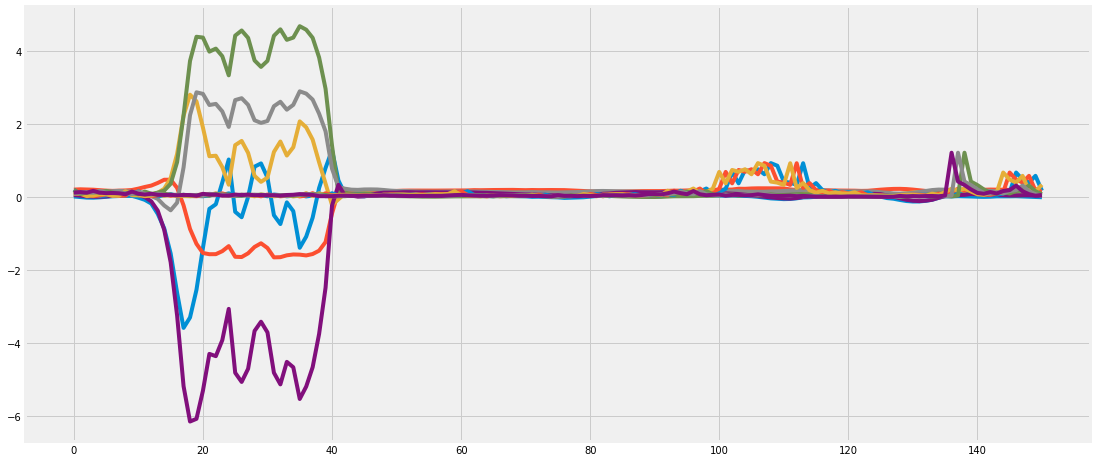

  3%|▎         | 4/128 [00:00<00:03, 33.53it/s]

Epoch 21


  4%|▍         | 5/128 [00:00<00:02, 43.50it/s]

Epoch 22


  4%|▍         | 5/128 [00:00<00:02, 42.98it/s]

Epoch 23


  3%|▎         | 4/128 [00:00<00:03, 36.68it/s]

Epoch 24


  4%|▍         | 5/128 [00:00<00:02, 43.45it/s]

Epoch 25


  4%|▍         | 5/128 [00:00<00:02, 44.05it/s]

Epoch 26


  4%|▍         | 5/128 [00:00<00:02, 44.32it/s]

Epoch 27


  3%|▎         | 4/128 [00:00<00:03, 36.03it/s]

Epoch 28


  3%|▎         | 4/128 [00:00<00:03, 38.03it/s]

Epoch 29


  4%|▍         | 5/128 [00:00<00:03, 40.64it/s]

Epoch 30


  3%|▎         | 4/128 [00:00<00:03, 33.80it/s]

Epoch 31


  3%|▎         | 4/128 [00:00<00:03, 34.70it/s]

Epoch 32


  4%|▍         | 5/128 [00:00<00:02, 41.00it/s]

Epoch 33


  4%|▍         | 5/128 [00:00<00:02, 42.68it/s]

Epoch 34


  4%|▍         | 5/128 [00:00<00:02, 42.22it/s]

Epoch 35


  4%|▍         | 5/128 [00:00<00:02, 42.35it/s]

Epoch 36


  3%|▎         | 4/128 [00:00<00:03, 39.66it/s]

Epoch 37


  4%|▍         | 5/128 [00:00<00:03, 40.71it/s]

Epoch 38


  3%|▎         | 4/128 [00:00<00:03, 33.66it/s]

Epoch 39


  3%|▎         | 4/128 [00:00<00:03, 36.31it/s]

Epoch 40


100%|██████████| 128/128 [00:03<00:00, 39.02it/s]


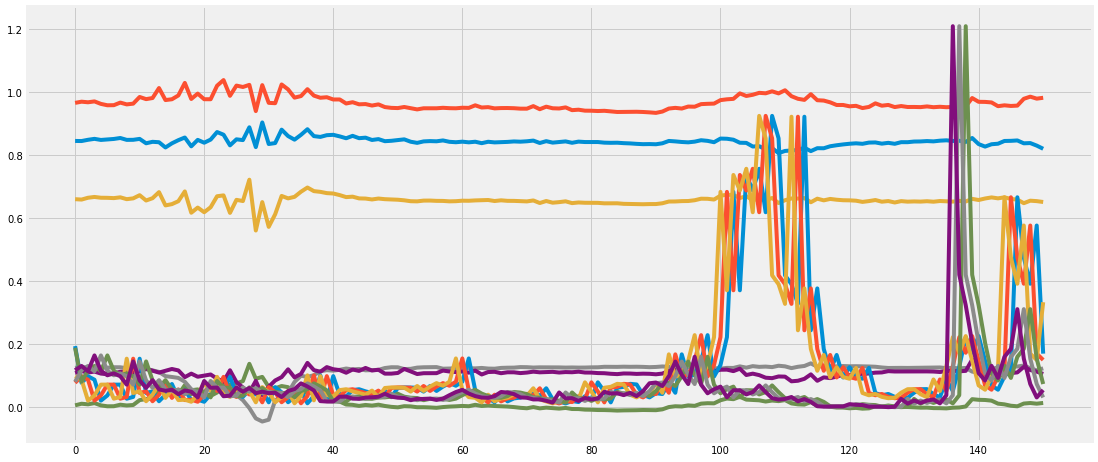

  2%|▏         | 3/128 [00:00<00:04, 26.65it/s]

Epoch 41


  3%|▎         | 4/128 [00:00<00:03, 37.57it/s]

Epoch 42


  4%|▍         | 5/128 [00:00<00:02, 41.49it/s]

Epoch 43


  4%|▍         | 5/128 [00:00<00:02, 42.21it/s]

Epoch 44


  4%|▍         | 5/128 [00:00<00:02, 42.02it/s]

Epoch 45


  4%|▍         | 5/128 [00:00<00:02, 42.19it/s]

Epoch 46


  4%|▍         | 5/128 [00:00<00:03, 40.44it/s]

Epoch 47


  4%|▍         | 5/128 [00:00<00:02, 41.02it/s]

Epoch 48


  4%|▍         | 5/128 [00:00<00:02, 43.02it/s]

Epoch 49


  4%|▍         | 5/128 [00:00<00:02, 42.23it/s]

Epoch 50


  3%|▎         | 4/128 [00:00<00:03, 39.63it/s]

Epoch 51


  3%|▎         | 4/128 [00:00<00:03, 38.41it/s]

Epoch 52


  3%|▎         | 4/128 [00:00<00:03, 36.86it/s]

Epoch 53


  3%|▎         | 4/128 [00:00<00:03, 38.98it/s]

Epoch 54


  3%|▎         | 4/128 [00:00<00:03, 39.79it/s]

Epoch 55


  3%|▎         | 4/128 [00:00<00:03, 36.28it/s]

Epoch 56


  4%|▍         | 5/128 [00:00<00:02, 42.31it/s]

Epoch 57


  4%|▍         | 5/128 [00:00<00:02, 42.88it/s]

Epoch 58


  4%|▍         | 5/128 [00:00<00:02, 41.72it/s]

Epoch 59


  4%|▍         | 5/128 [00:00<00:02, 41.77it/s]

Epoch 60


100%|██████████| 128/128 [00:03<00:00, 41.20it/s]


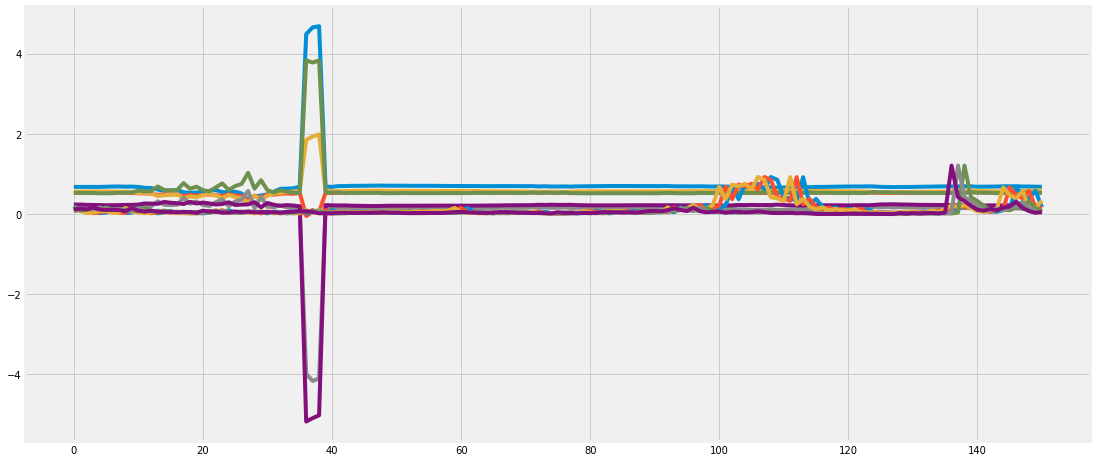

  3%|▎         | 4/128 [00:00<00:03, 39.08it/s]

Epoch 61


  3%|▎         | 4/128 [00:00<00:03, 37.99it/s]

Epoch 62


  4%|▍         | 5/128 [00:00<00:03, 40.69it/s]

Epoch 63


  4%|▍         | 5/128 [00:00<00:02, 42.81it/s]

Epoch 64


  4%|▍         | 5/128 [00:00<00:02, 42.98it/s]

Epoch 65


  3%|▎         | 4/128 [00:00<00:03, 36.15it/s]

Epoch 66


  4%|▍         | 5/128 [00:00<00:02, 41.26it/s]

Epoch 67


  4%|▍         | 5/128 [00:00<00:02, 43.44it/s]

Epoch 68


  4%|▍         | 5/128 [00:00<00:03, 40.99it/s]

Epoch 69


  4%|▍         | 5/128 [00:00<00:03, 39.97it/s]

Epoch 70


  4%|▍         | 5/128 [00:00<00:02, 44.50it/s]

Epoch 71


  4%|▍         | 5/128 [00:00<00:02, 44.72it/s]

Epoch 72


  4%|▍         | 5/128 [00:00<00:02, 45.65it/s]

Epoch 73


  4%|▍         | 5/128 [00:00<00:02, 42.93it/s]

Epoch 74


  4%|▍         | 5/128 [00:00<00:03, 39.42it/s]

Epoch 75


  4%|▍         | 5/128 [00:00<00:02, 44.20it/s]

Epoch 76


  3%|▎         | 4/128 [00:00<00:03, 38.82it/s]

Epoch 77


  4%|▍         | 5/128 [00:00<00:03, 38.09it/s]

Epoch 78


  4%|▍         | 5/128 [00:00<00:02, 43.83it/s]

Epoch 79


  4%|▍         | 5/128 [00:00<00:02, 42.03it/s]

Epoch 80


100%|██████████| 128/128 [00:03<00:00, 41.42it/s]


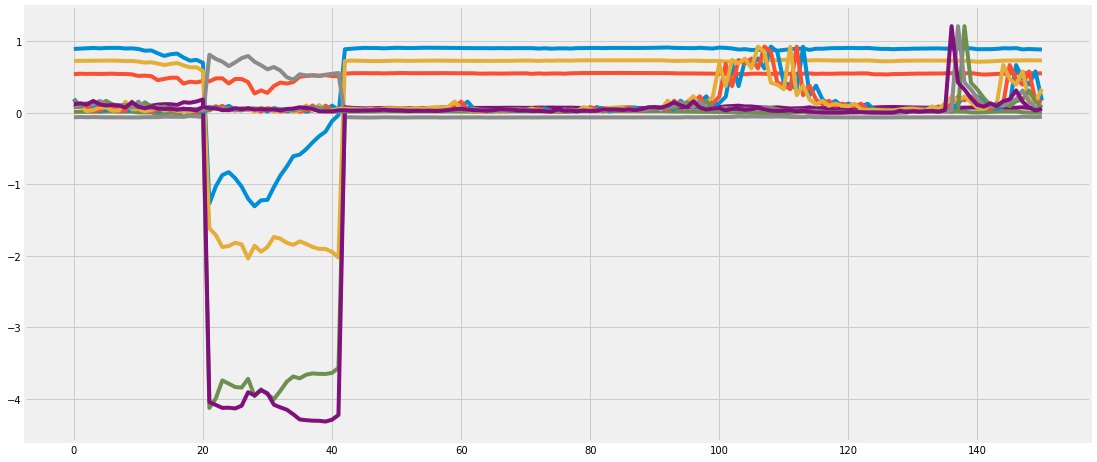

  3%|▎         | 4/128 [00:00<00:03, 34.21it/s]

Epoch 81


  4%|▍         | 5/128 [00:00<00:02, 41.12it/s]

Epoch 82


  4%|▍         | 5/128 [00:00<00:02, 41.56it/s]

Epoch 83


  4%|▍         | 5/128 [00:00<00:02, 44.86it/s]

Epoch 84


  3%|▎         | 4/128 [00:00<00:03, 38.17it/s]

Epoch 85


  4%|▍         | 5/128 [00:00<00:02, 42.63it/s]

Epoch 86


  4%|▍         | 5/128 [00:00<00:03, 40.81it/s]

Epoch 87


  4%|▍         | 5/128 [00:00<00:02, 42.14it/s]

Epoch 88


  4%|▍         | 5/128 [00:00<00:02, 41.57it/s]

Epoch 89


  4%|▍         | 5/128 [00:00<00:02, 42.74it/s]

Epoch 90


  3%|▎         | 4/128 [00:00<00:03, 39.85it/s]

Epoch 91


  4%|▍         | 5/128 [00:00<00:02, 41.74it/s]

Epoch 92


  4%|▍         | 5/128 [00:00<00:03, 40.19it/s]

Epoch 93


  3%|▎         | 4/128 [00:00<00:03, 39.73it/s]

Epoch 94


  3%|▎         | 4/128 [00:00<00:03, 39.99it/s]

Epoch 95


  4%|▍         | 5/128 [00:00<00:02, 41.64it/s]

Epoch 96


  4%|▍         | 5/128 [00:00<00:02, 43.85it/s]

Epoch 97


  4%|▍         | 5/128 [00:00<00:02, 44.05it/s]

Epoch 98


  4%|▍         | 5/128 [00:00<00:02, 45.44it/s]

Epoch 99


  4%|▍         | 5/128 [00:00<00:02, 45.13it/s]

Epoch 100


100%|██████████| 128/128 [00:02<00:00, 42.80it/s]


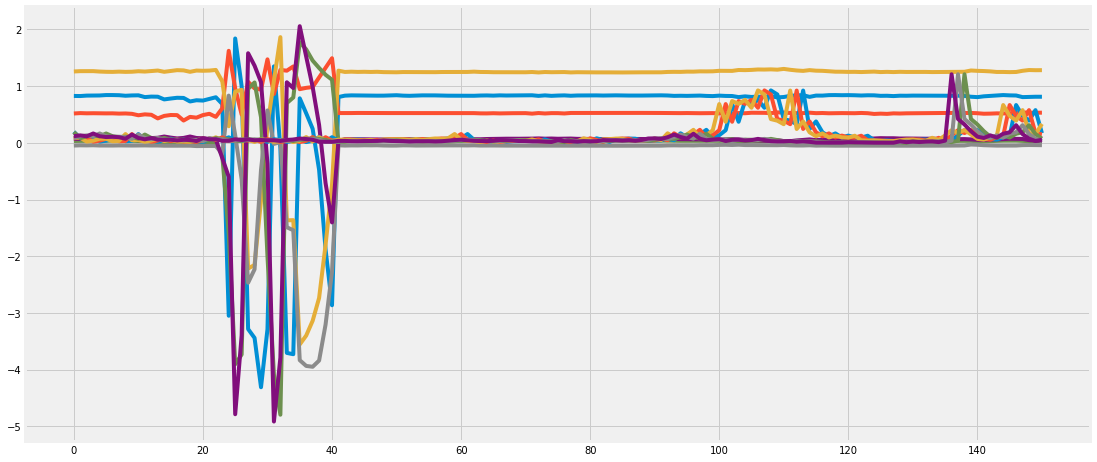

In [0]:
training(x_train, y_train, x_test, y_test, epochs=100, random_size=128)


### Data Analysis

- $\textbf{Our LSTM generator is not pre-trained}$, which means $\textbf{The GAN model learns from scratch}$, though we didn't get results as good as the previous models, but $\textbf{this experimental model shows potentials}$, as we can see 

- The GAN model successfully learned the correct range.
- $\textbf{The GAN model learns the most drastic characteristics of the data}$. Namely, the sudden huge changes. 

## $\textbf{Part IV. Conclusions and Next steps}$

### Conclusions

In this project on analyzing and forecasting the Stock price volatility data we managed to accomplish the following goals:
- $\textbf{Data cleaning in Part I}$
    - Basic manipulation: read the file, find null values and set index and some column plottings.
    - Get rid of the random drops in the prices of stock $a$ and stock $d$.  
- $\textbf{Statistical analysis in Part II}$
  - Correlation analysis: compute different correlations and use to to validate our choice of "Inflation" as the target. 
  - Time series analysis with ```ARIMA```: grid search for optimal parameters and train the ARIMA model for predicting and forcasting.

- $\textbf{Build 3 Deep learning models from basic one to advanced one in Part III}$
  
  - Basic model: single-step, single-feature forecasting with LSTM
  - Generalized model: multi-step, multi-feature forcasting with LSTM
  - Advanced model: Generative Adversarial Network (GAN) with LSTM and CNN. 
We readdress the following points,
- $\textbf{The accuracy rate for going up and going down from the LSTM models are all
above $80\%$. The highest value accuracy rate is $53\%$.}$
- $\textbf{The higher the sample frequency, the harder to train the deep learning models, we chose to work with the daily volatility data, the code can be modified easily to include all other possible sample frequencies.}$
- $\textbf{The relative importance of more and less recent samples is handled by the LSTM models, which emphasize more on more recent samples than less recent ones.}$
- Stock volatility shows certain seasonality.
- Several stock pairs show correlations. 
- LSTM models capture the trend of the data developed through time
- The GAN model successfully learned the correct range.
- The GAN model learns the most drastic characteristics of the data.

### Next steps

The ```stockdata3.csv``` is not a big dataset, the following are a few furthur steps that we have done but not included in the notebook for clarity, or directions we can try to investigate:

- It's natural to $\textbf{try different combinations of the source-target stocks splitings}$, for example, $f$ can also be included for the prediction of stock $c$'s future volatilities, since they have a quite high correlation. It can be easily achieved by modifying few lines of code.

- $\textbf{Pre-train the LSTM model in the GAN model. In this way, the model can generate predictions at least as good as the first two models and with the CNN discriminator, the LSTM model can also learn the characteristics of the real data, in this way, we can hope to get even better predictions}$.